In [2]:
library(readxl)
library(ggplot2)
library(RColorBrewer)
library(scales)
library(extrafont)
library(ggplot2)
library(tidyverse)
library(tidygraph)
library(wordcloud)
library(wordcloud2)
library(webshot)
library(tm)
library(igraph)
library(ggraph)
library(qgraph)
library(networkD3)
library(htmlwidgets)
library(htmltools)
library(IRdisplay)
library(glue)
library(cowplot)
library(magrittr)
library(plotly)
library(widyr)
library(hms)
library(lubridate) 
library(tidytext)

In [4]:
data <- read_excel("data\\Data Gabungan.xlsx")
head(data,10)

Judul                                                                                              
1  GKR Hemas Ajak Karang Taruna Sleman Kreatif di Ruang Digital                                       
2  GKR Hemas Resmikan Gedung Gambuh RSU Sakina Idaman, Ini Layanan Terpadu Geriatric                  
3  GKR Hemas Kembali Daftar Jadi Anggota DPD RI pada Pemilu 2024, Begini Perjalanan Politiknya        
4  BREAKING NEWS : GKR Hemas Resmi Mendaftar Jadi Calon Anggota DPD RI pada Pemilu 2024               
5  Raja Charles III Ternyata Pernah ke Yogyakarta, Temu Kangen dengan Sultan Hamengkubuwono X         
6  Tinjau Pasar Beringharjo Yogyakarta, GKR Hemas Pastikan Harga Bahan Pokok Stabil Jelang Lebaran    
7  GKR Hemas Bicara Soal Kemegahan Bahasa Jawa dalam Seminar Bersama Balai Bahasa Yogyakarta          
8  TP PKK DIY Sosialisasikan Gemarikan di Kulon Progo, Sasar Ibu Hamil, Menyusui dan Miliki Batita    
9  Bertemu GKR Hemas, Pemuda Pancasila DIY Diminta Bantu Menjaga Keamanan                             
10 Tanggapi Aksi Penganiayaan di Titik Nol Kilometer Jogja, GKR Hemas: Anak-Anak Ini Ingin Jadi Jagoan
   Konten                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [13]:
# Set the plot size
options(repr.plot.width = 15, repr.plot.height = 12)

In [5]:
str(data)

tibble [32 × 9] (S3: tbl_df/tbl/data.frame)
 $ Judul       : chr [1:32] "GKR Hemas Ajak Karang Taruna Sleman Kreatif di Ruang Digital" "GKR Hemas Resmikan Gedung Gambuh RSU Sakina Idaman, Ini Layanan Terpadu Geriatric" "GKR Hemas Kembali Daftar Jadi Anggota DPD RI pada Pemilu 2024, Begini Perjalanan Politiknya" "BREAKING NEWS : GKR Hemas Resmi Mendaftar Jadi Calon Anggota DPD RI pada Pemilu 2024" ...
 $ Konten      : chr [1:32] "Gusti Kanjeng Ratu Hemas mengajak generasi muda Karang Taruna Kabupaten Sleman untuk meraih peluang secara krea"| __truncated__ "Bertepatan dengan puncak HUT ke 28, RSU Sakina Idaman resmi menghadirkan Geriatric Center dan Rehabilitasi Medi"| __truncated__ "Permaisuri Keraton Yogyakarta Gusti Kanjeng Ratu (GKR) Hemas resmi maju dalam pemilihan calon anggota Dewan Per"| __truncated__ "Permaisuri Keraton Yogyakarta, Gusti Kanjeng Ratu (GKR) Hemas, resmi maju dalam pemilihan calon anggota Dewan P"| __truncated__ ...
 $ Link        : chr [1:32] "https://jogja.tribu

## Line chart jumlah berita perhari

In [6]:
# Convert the 'Tgl' column to Date format
data$Tgl <- as.Date(data$Tgl)

In [7]:
# Count the number of occurrences for each date and Kanal Berita
date_counts <- table(data$Tgl, data$Kanal_Berita)

In [8]:
# Create a data frame with the date, Kanal Berita, and count
date_df <- data.frame(Date = as.Date(row.names(date_counts)),
                      Kanal.Berita = rep(colnames(date_counts), each = nrow(date_counts)),
                      Count = as.numeric(date_counts))

In [9]:
# Sort the data frame by Kanal Berita and Date
date_df <- date_df[order(date_df$Kanal.Berita, date_df$Date), ]
date_df

,Date,Kanal.Berita,Count
,<date>,<chr>,<dbl>
1,2023-01-26,Harian Jogja,0
2,2023-01-31,Harian Jogja,0
3,2023-02-02,Harian Jogja,0
4,2023-02-06,Harian Jogja,0
5,2023-03-07,Harian Jogja,0
6,2023-03-09,Harian Jogja,0
7,2023-03-13,Harian Jogja,0
8,2023-03-15,Harian Jogja,0
9,2023-03-31,Harian Jogja,1


In [10]:
# Generate pastel colors for each Kanal Berita
num_colors <- length(unique(date_df$Kanal.Berita))
colors <- brewer.pal(num_colors, "Pastel1")

In [11]:
# Menentukan skema warna manual berdasarkan kategori kanal_berita
colors <- c("Kedaulatan Rakyat" = "#CD2027", "Tribun Jogja" = "#0066B2", "Harian Merapi" = "#ECEA5A","Harian Jogja" = "#075E3F")

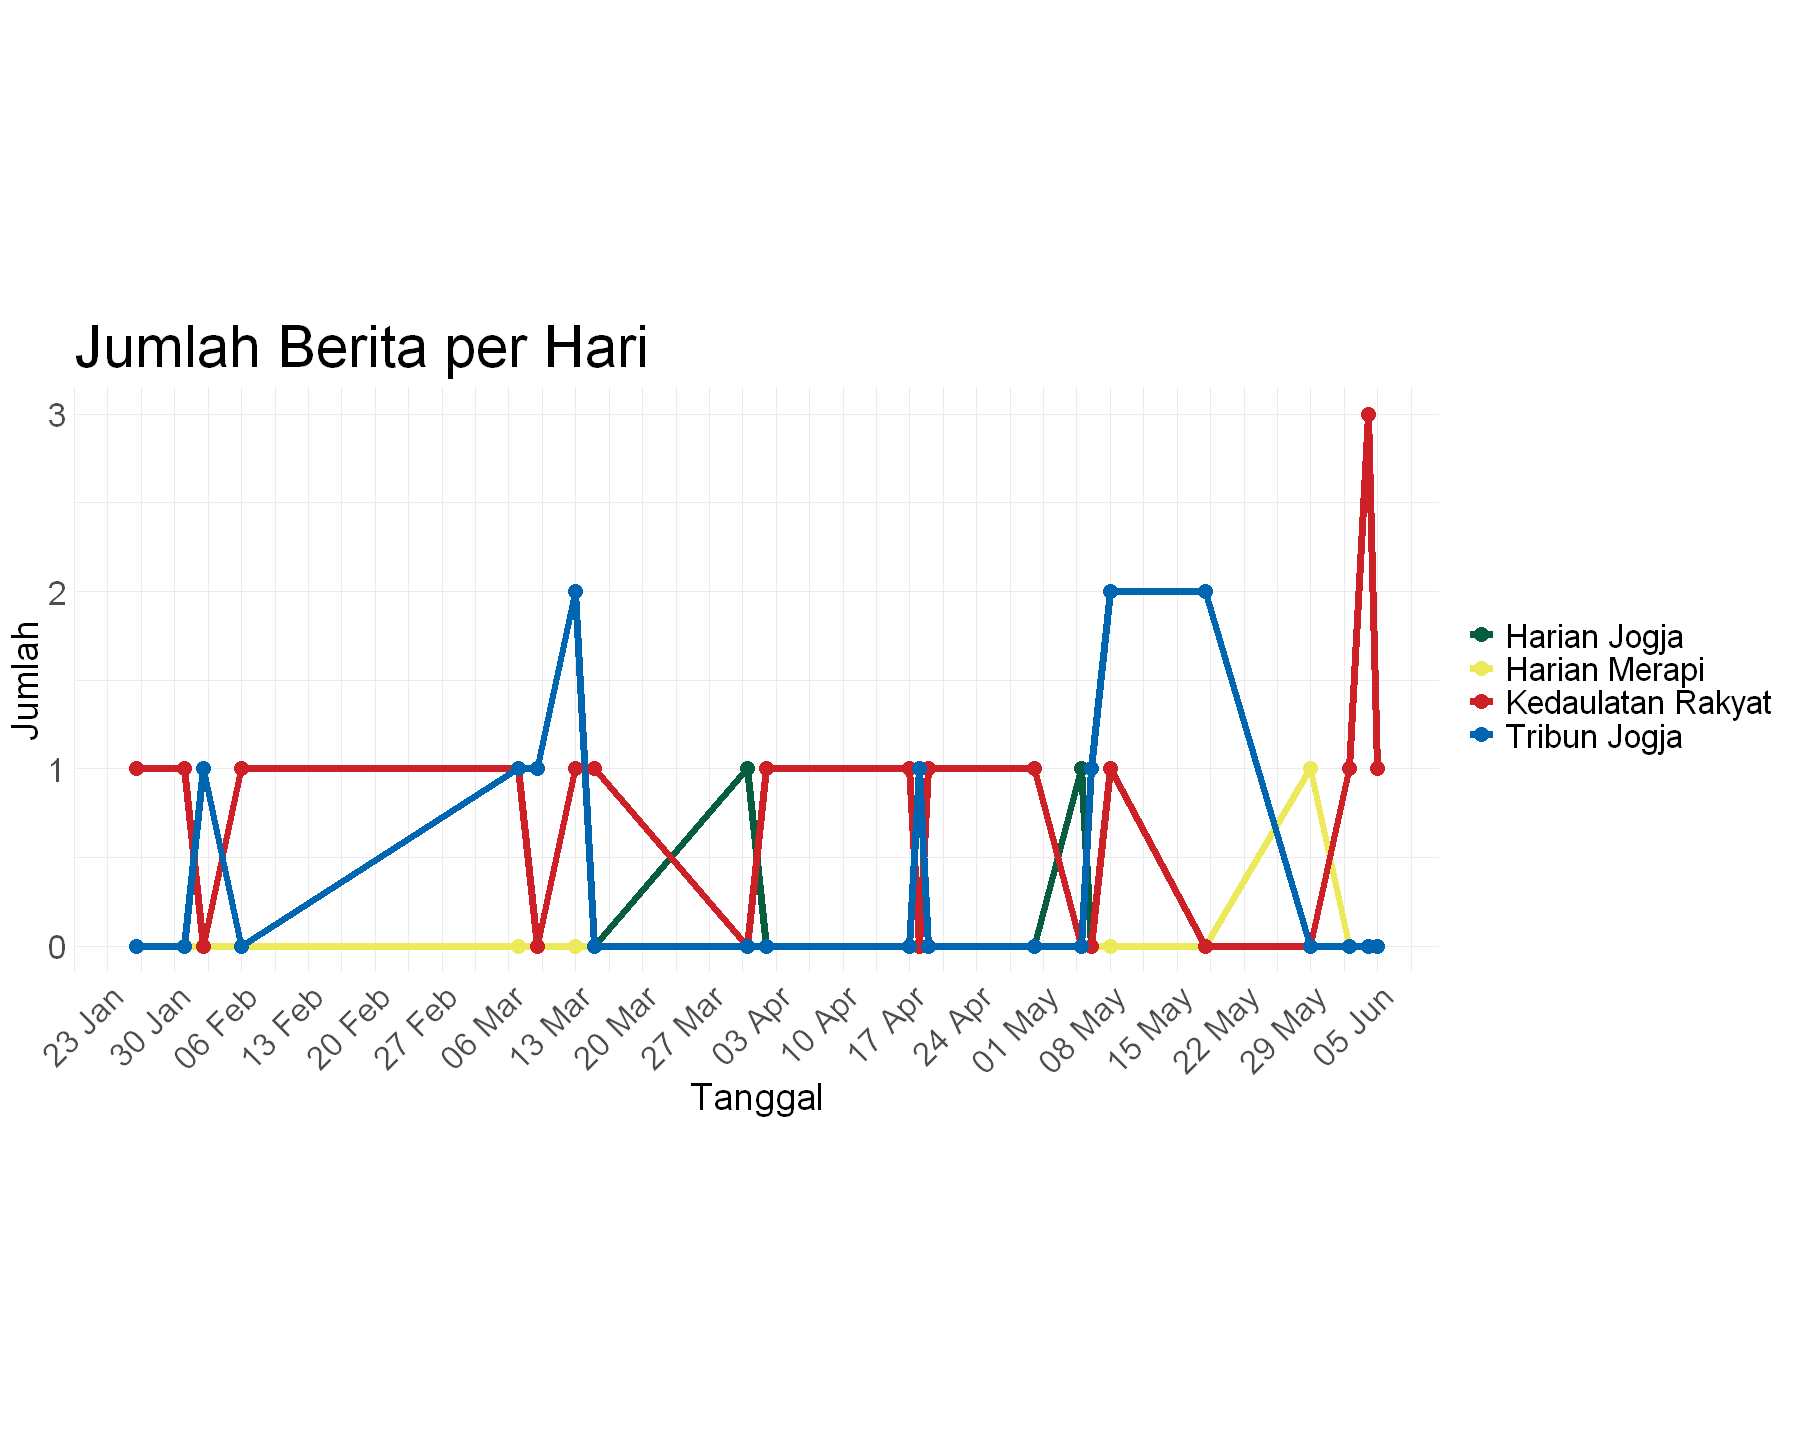

In [14]:
# Membuat chart dengan warna khusus pada setiap kategori kanal_berita
plot <- ggplot(date_df, aes(x = Date, y = Count, color = Kanal.Berita)) +
  geom_line(linewidth = 2) +
  geom_point(size = 4) +
  labs(x = "Tanggal", y = "Jumlah", title = "Jumlah Berita per Hari") +
  scale_color_manual(values = colors) +  # Menggunakan skema warna manual
  scale_x_date(date_breaks = "1 week", date_labels = "%d %b") +
  theme_minimal() +
  theme(
    aspect.ratio = 9/21,
    plot.title = element_text(size = 35),
    axis.text.x = element_text(size = 20, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 20),
    axis.title = element_text(size = 22),
    legend.title = element_blank(),
    legend.text = element_text(size = 20)
  )

# Menampilkan chart
plot

In [15]:
# Save the plot with specified dimensions
ggsave("date_chart.png", plot, width = 25.6, height = 10.8, dpi = 300)

## Heatmap frekuensi pemberitaan perhari satu minggu

In [16]:
# Convert the 'Tgl' column to Date format
data$Tgl <- as.Date(data$Tgl)

In [17]:
# Extract the day of the week from the date
data$Day <- weekdays(data$Tgl)

In [18]:
day_kanal_counts <- data %>% count(Day, Kanal_Berita)
day_kanal_counts

Day,Kanal_Berita,n
<chr>,<chr>,<int>
Friday,Harian Jogja,2
Friday,Kedaulatan Rakyat,1
Monday,Harian Jogja,1
Monday,Harian Merapi,1
Monday,Kedaulatan Rakyat,5
Monday,Tribun Jogja,4
Saturday,Tribun Jogja,1
Sunday,Kedaulatan Rakyat,5
Thursday,Kedaulatan Rakyat,1


In [19]:
str(day_kanal_counts)

tibble [14 × 3] (S3: tbl_df/tbl/data.frame)
 $ Day         : chr [1:14] "Friday" "Friday" "Monday" "Monday" ...
 $ Kanal_Berita: chr [1:14] "Harian Jogja" "Kedaulatan Rakyat" "Harian Jogja" "Harian Merapi" ...
 $ n           : int [1:14] 2 1 1 1 5 4 1 5 1 4 ...


In [20]:
day_kanal_counts <- day_kanal_counts %>%
  arrange(match(Day, c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")))

In [21]:
day_kanal_counts <- day_kanal_counts %>%
  mutate(Day = recode(Day, "Sunday" = "Minggu", "Monday" = "Senin", "Tuesday" = "Selasa",
                      "Wednesday" = "Rabu", "Thursday" = "Kamis", "Friday" = "Jumat",
                      "Saturday" = "Sabtu"))
day_kanal_counts

Day,Kanal_Berita,n
<chr>,<chr>,<int>
Minggu,Kedaulatan Rakyat,5
Senin,Harian Jogja,1
Senin,Harian Merapi,1
Senin,Kedaulatan Rakyat,5
Senin,Tribun Jogja,4
Selasa,Harian Jogja,1
Selasa,Kedaulatan Rakyat,2
Selasa,Tribun Jogja,2
Rabu,Kedaulatan Rakyat,2


In [22]:
# Mengurutkan kolom "Day" secara berurutan
day_kanal_counts$Day <- factor(day_kanal_counts$Day, levels = c("Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"))
day_kanal_counts

Day,Kanal_Berita,n
<fct>,<chr>,<int>
Minggu,Kedaulatan Rakyat,5
Senin,Harian Jogja,1
Senin,Harian Merapi,1
Senin,Kedaulatan Rakyat,5
Senin,Tribun Jogja,4
Selasa,Harian Jogja,1
Selasa,Kedaulatan Rakyat,2
Selasa,Tribun Jogja,2
Rabu,Kedaulatan Rakyat,2


In [130]:
# Menentukan skema warna manual berdasarkan kategori kanal_berita
colors <- c("#CD2027", "#0066B2", "#ECEA5A")

# Mengubah kanal_berita menjadi faktor dengan urutan sesuai dengan warna yang ditentukan
day_kanal_counts$Kanal_Berita <- factor(day_kanal_counts$Kanal_Berita, levels = c("Kedaulatan Rakyat", "Tribun Jogja", "Harian Merapi"))

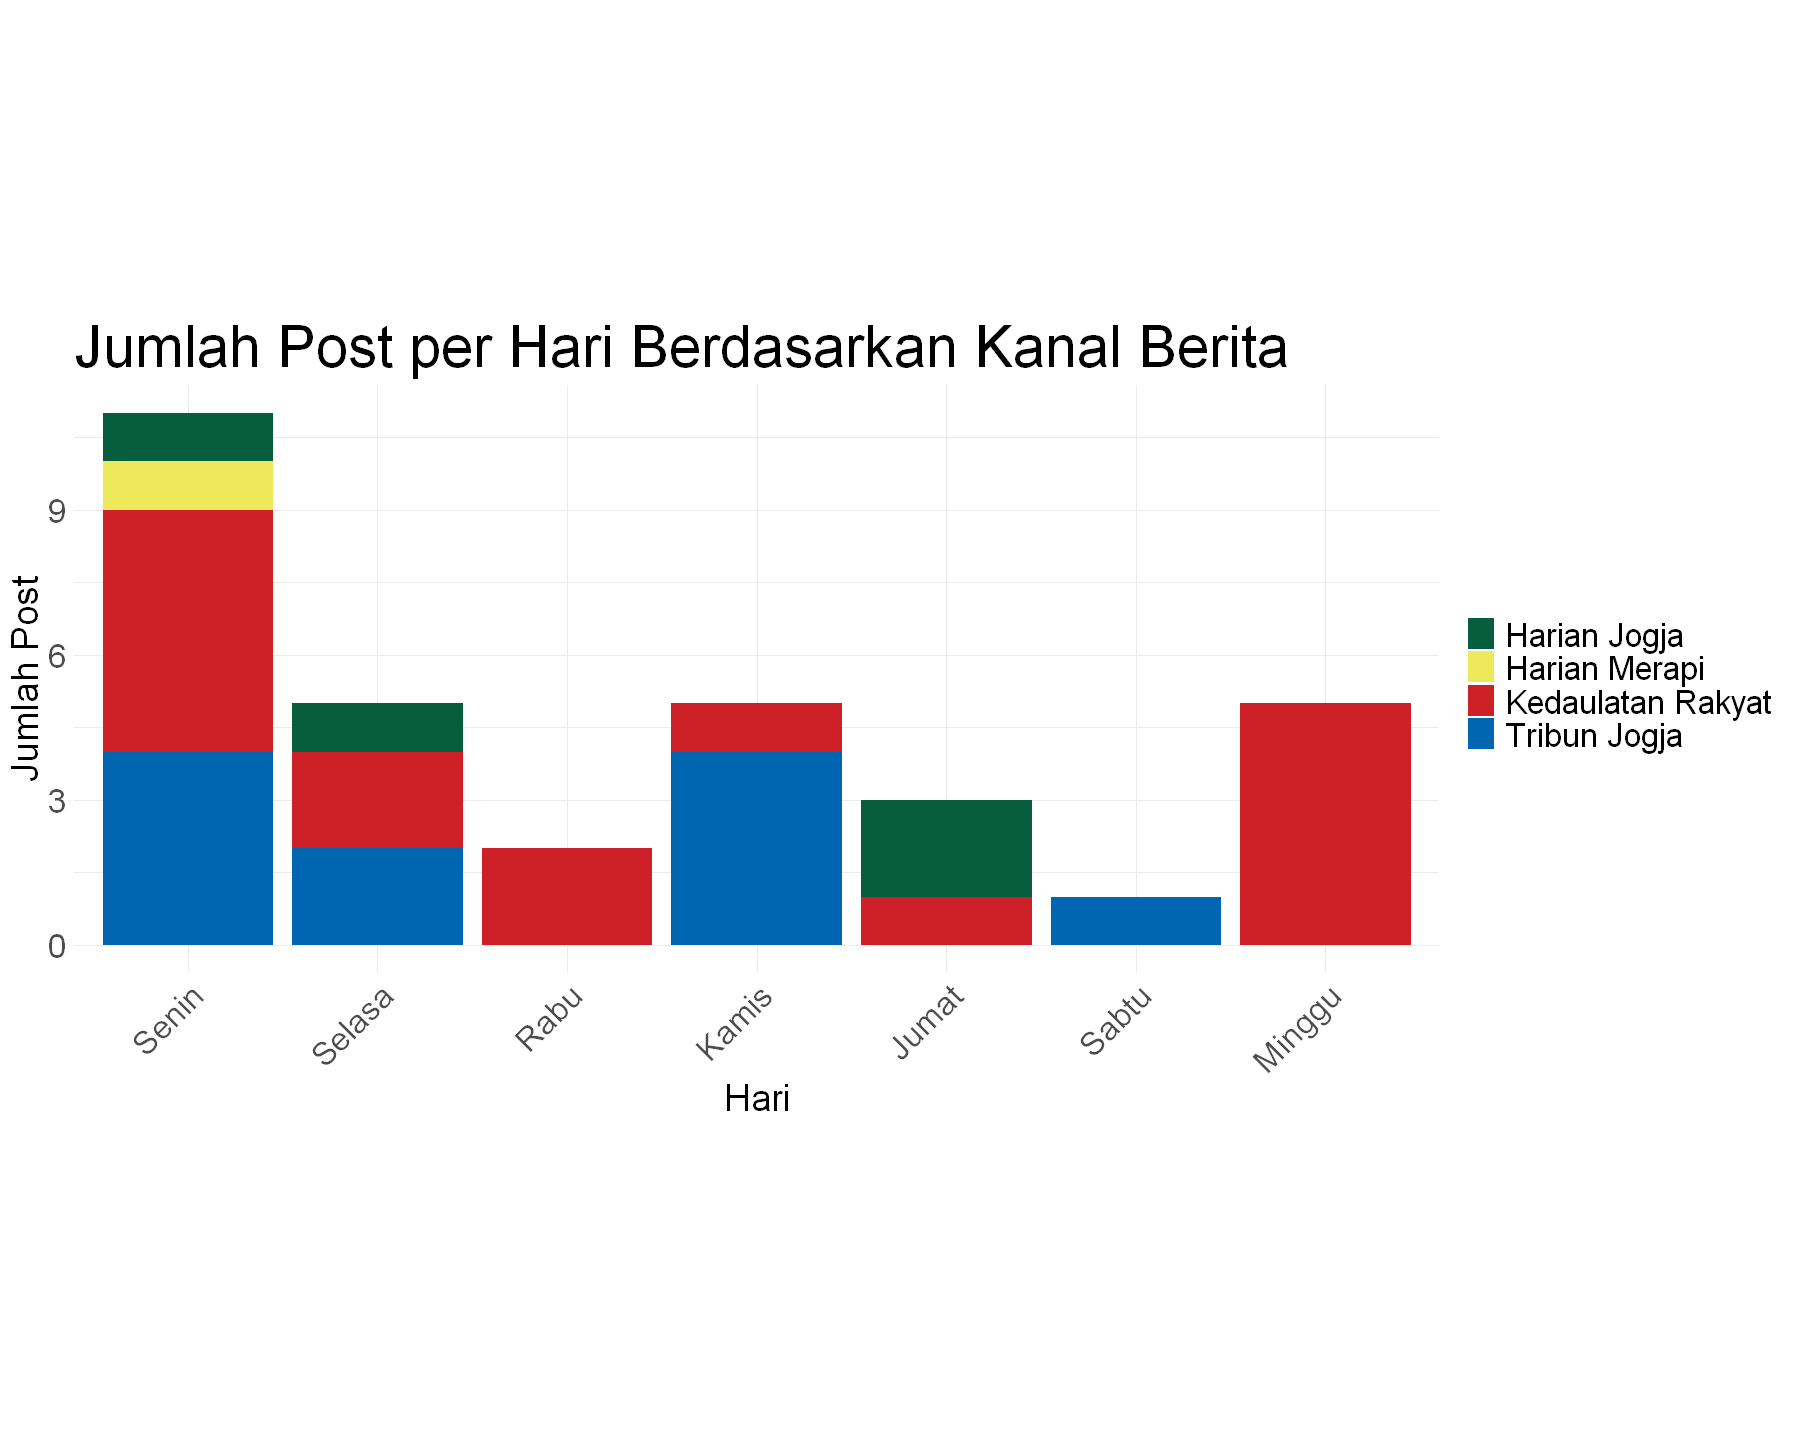

In [23]:
# Membuat stacked bar chart dengan warna khusus pada setiap kategori kanal_berita
bar_chart <- ggplot(day_kanal_counts, aes(x = Day, y = n, fill = Kanal_Berita)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = colors) +  # Menggunakan skema warna manual
  labs(x = "Hari", y = "Jumlah Post", title = "Jumlah Post per Hari Berdasarkan Kanal Berita") +
  theme_minimal() +
  theme(
    aspect.ratio = 9/21,
    axis.text.x = element_text(size = 20, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 20),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 35),
    legend.title = element_blank(),
    legend.text = element_text(size = 20)
  )
bar_chart 

In [26]:

#options(repr.plot.width = 15, repr.plot.height = 12)

ggsave("week_bar_chart.png", bar_chart, width = 25.6, height = 10.8, dpi = 300)

## Location Bar chart

In [652]:
# Menentukan skema warna manual berdasarkan kategori kanal_berita
colors <- c("Kedaulatan Rakyat" = "#CD2027", "Tribun Jogja" = "#0066B2", "Harian Merapi" = "#ECEA5A")

In [27]:
# Menghitung jumlah artikel per penulis dan kanal_berita
lokasi_df <- data %>%
  group_by(Lokasi, Kanal_Berita) %>%
  count() %>%
  ungroup() %>%
  arrange(desc(n))

lokasi_df

Lokasi,Kanal_Berita,n
<chr>,<chr>,<int>
Yogya,Kedaulatan Rakyat,11
DIY,Tribun Jogja,4
Yogya,Tribun Jogja,4
Yogya,Harian Jogja,3
Sleman,Kedaulatan Rakyat,2
Sleman,Tribun Jogja,2
Bantul,Harian Jogja,1
Bantul,Kedaulatan Rakyat,1
DIY,Harian Merapi,1


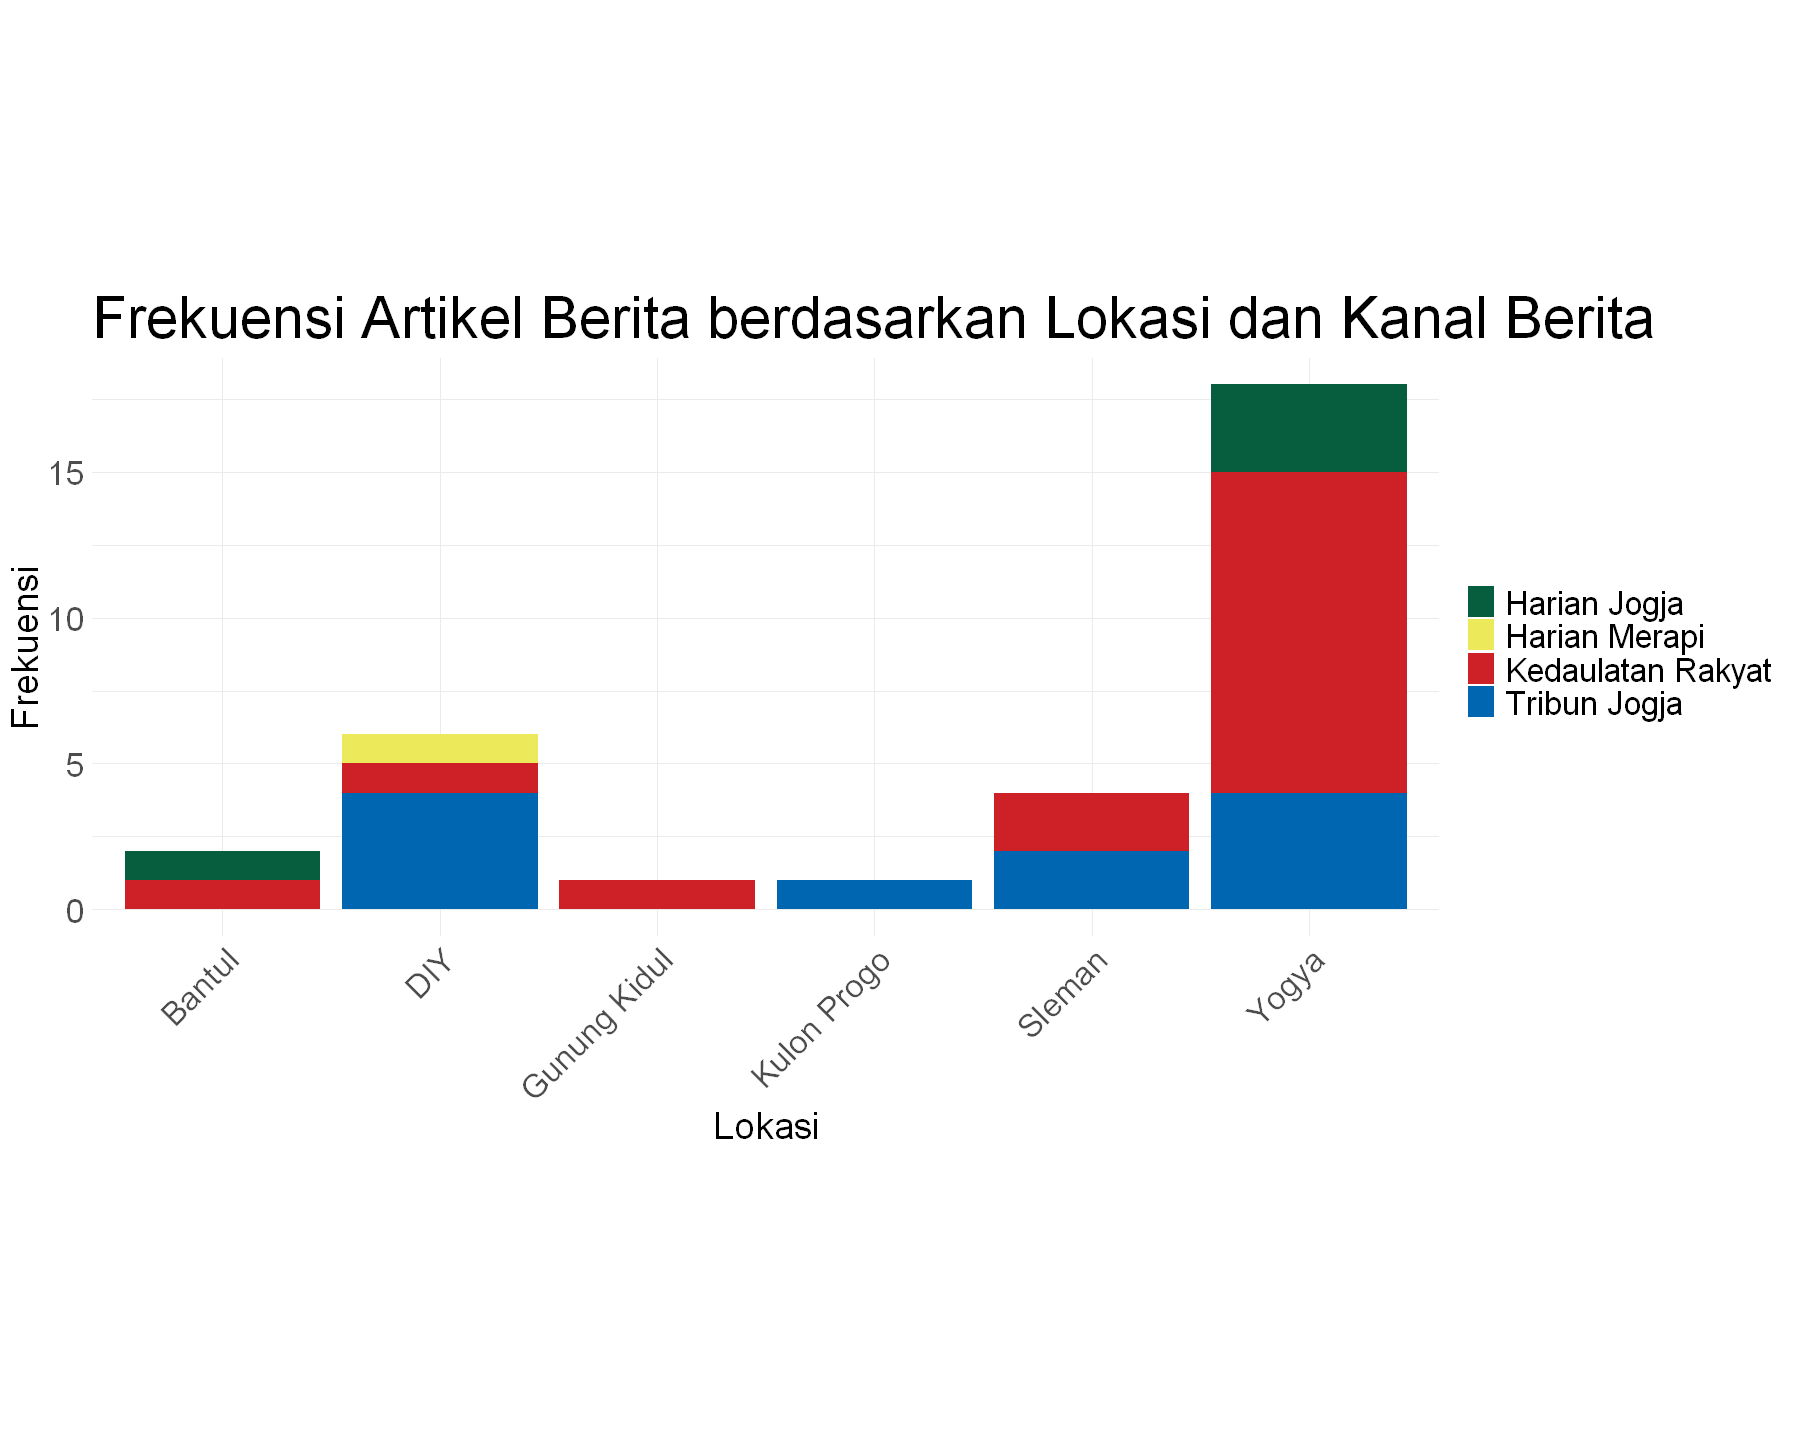

In [28]:
# Membuat stacked bar chart dengan warna khusus pada setiap kategori kanal_berita
bar_chart <- ggplot(lokasi_df, aes(x = Lokasi, y = n, fill = Kanal_Berita)) +
  geom_bar(stat = "identity") +
  labs(x = "Lokasi", y = "Frekuensi", title = "Frekuensi Artikel Berita berdasarkan Lokasi dan Kanal Berita") +
  scale_fill_manual(values = colors) +  # Menggunakan skema warna manual
  theme_minimal() +
  theme(
    aspect.ratio = 9/21,
    axis.text.x = element_text(size = 20, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 20),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 35),
    legend.title = element_blank(),
    legend.text = element_text(size = 20)
  )
bar_chart

In [29]:
# Save the plot with specified dimensions
ggsave("lokasi_chart.png", bar_chart, width = 25.6, height = 10.8, dpi = 300)

## Horizontal Bar Chart Penulis

In [152]:
colors <- c("Kedaulatan Rakyat" = "#CD2027", "Tribun Jogja" = "#0066B2", "Harian Merapi" = "#ECEA5A")

In [30]:
# Menghitung jumlah artikel per penulis dan kanal_berita
penulis_df <- data %>%
  group_by(Penulis, Kanal_Berita) %>%
  count() %>%
  ungroup() %>%
  top_n(5, n) %>%
  arrange(desc(n))

Warning message:
"The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in
ggplot2 3.3.4.
ℹ Please use "none" instead."


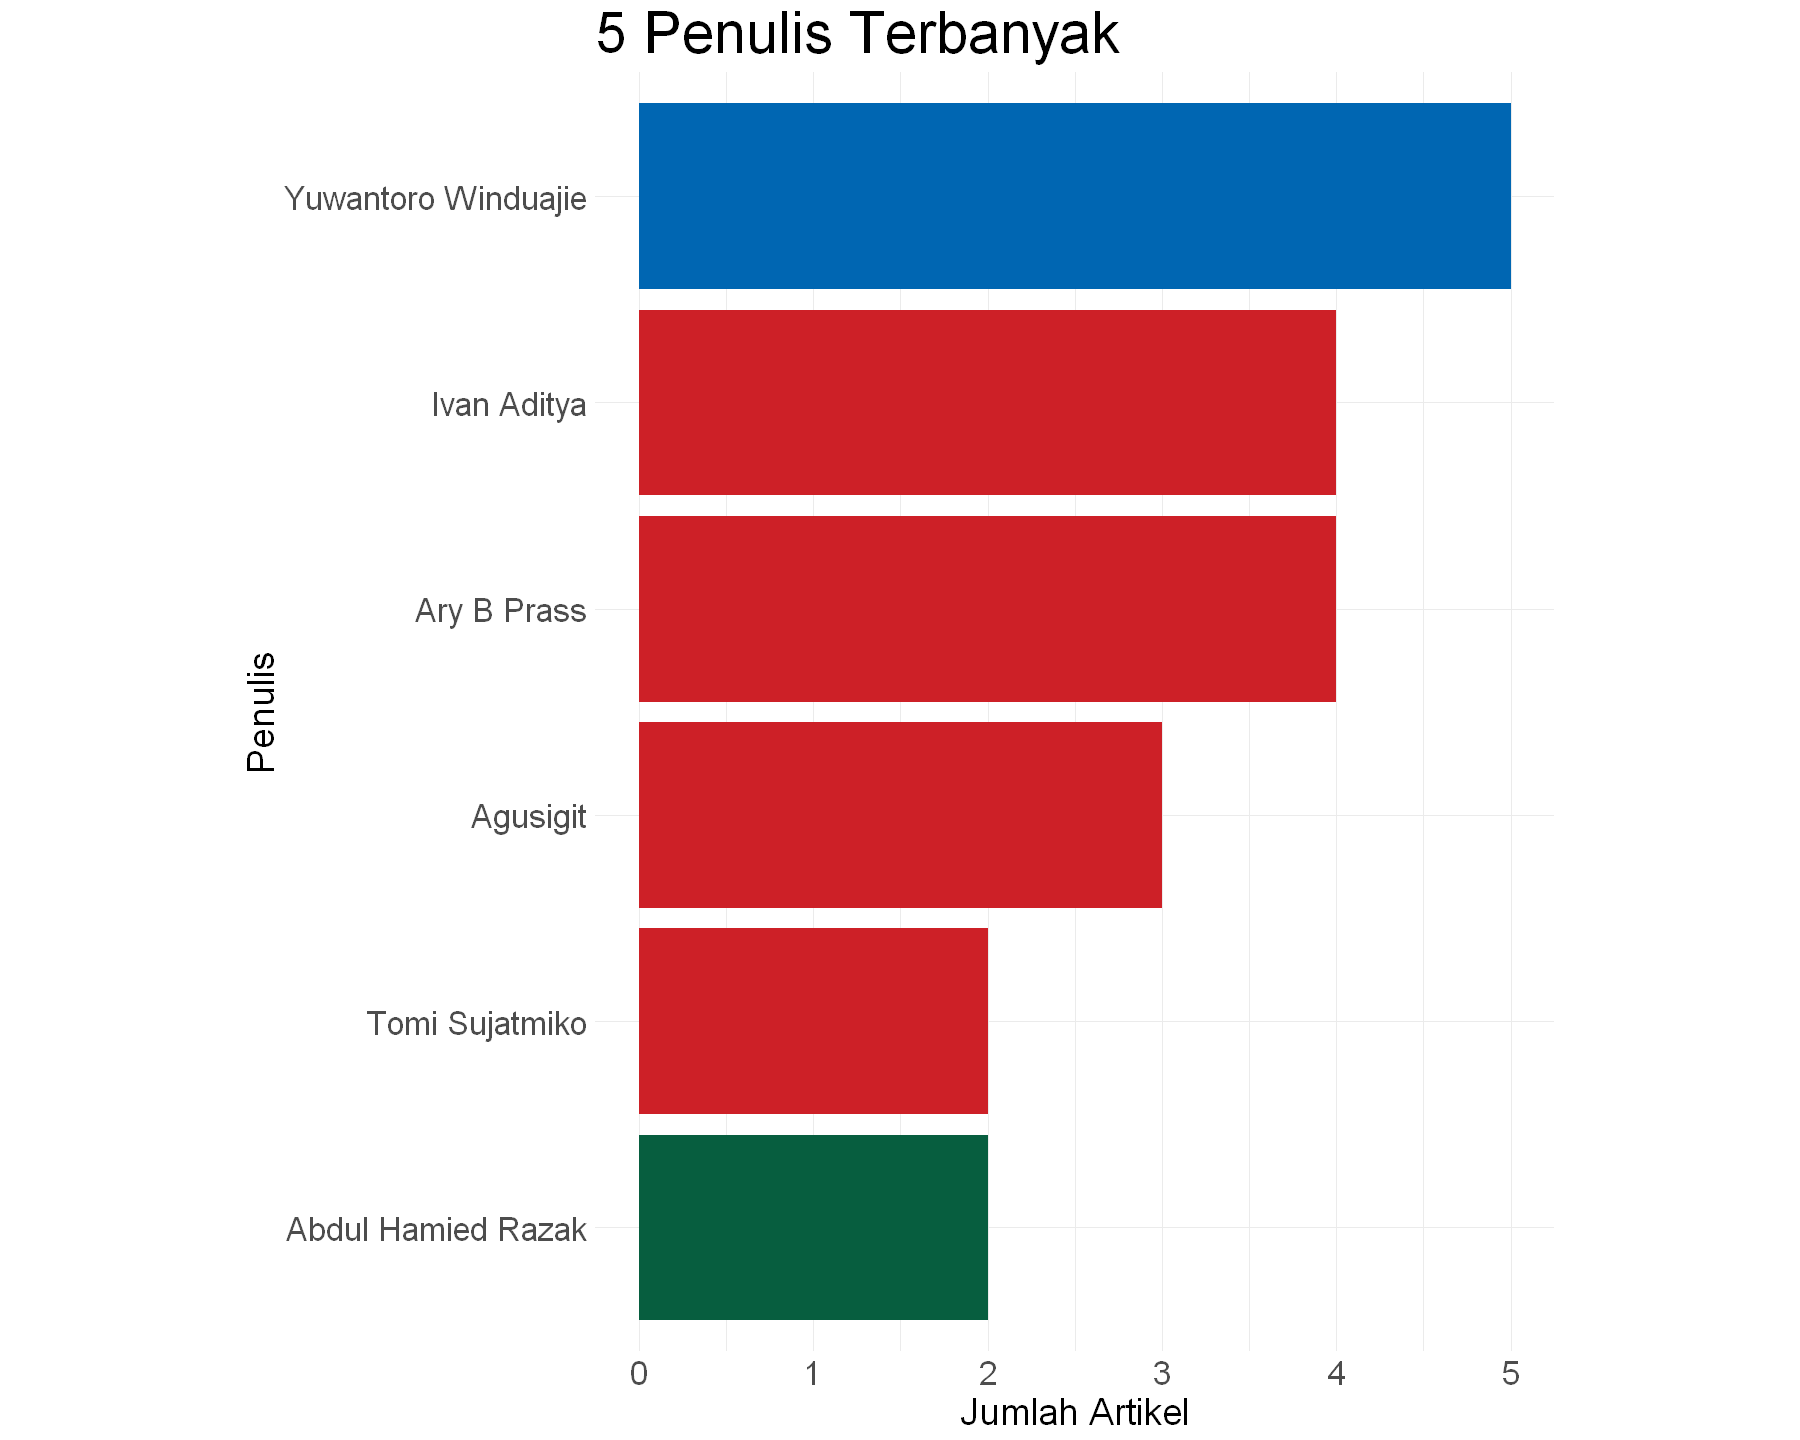

In [31]:
# Membuat horizontal bar chart dengan warna khusus pada setiap kategori kanal_berita
bar_chart <- ggplot(penulis_df, aes(x = n, y = fct_reorder(Penulis, n), fill = Kanal_Berita)) +
  geom_col() +
  labs(x = "Jumlah Artikel", y = "Penulis", title = "5 Penulis Terbanyak") +
  scale_fill_manual(values = c(Kedaulatan_Rakyat = "#CD2027", colors), guide = FALSE) +
  theme_minimal() +
  theme(
    aspect.ratio = 16/12,
    axis.text.x = element_text(size = 20),
    axis.text.y = element_text(size = 20),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 35)
  )

# Menampilkan horizontal bar chart
bar_chart

In [32]:
# Save the plot with specified dimensions
ggsave("penulis_chart.png", bar_chart,  width=12, height=15)

## Horizontal Bar Chart Editor

In [35]:
# Menghitung jumlah artikel per penulis dan kanal_berita
editor_df <- data %>%
  filter(!is.na(Editor)) %>%
  group_by(Editor, Kanal_Berita) %>%
  count() %>%
  ungroup() %>%
  top_n(5, n) %>%
  arrange(desc(n))

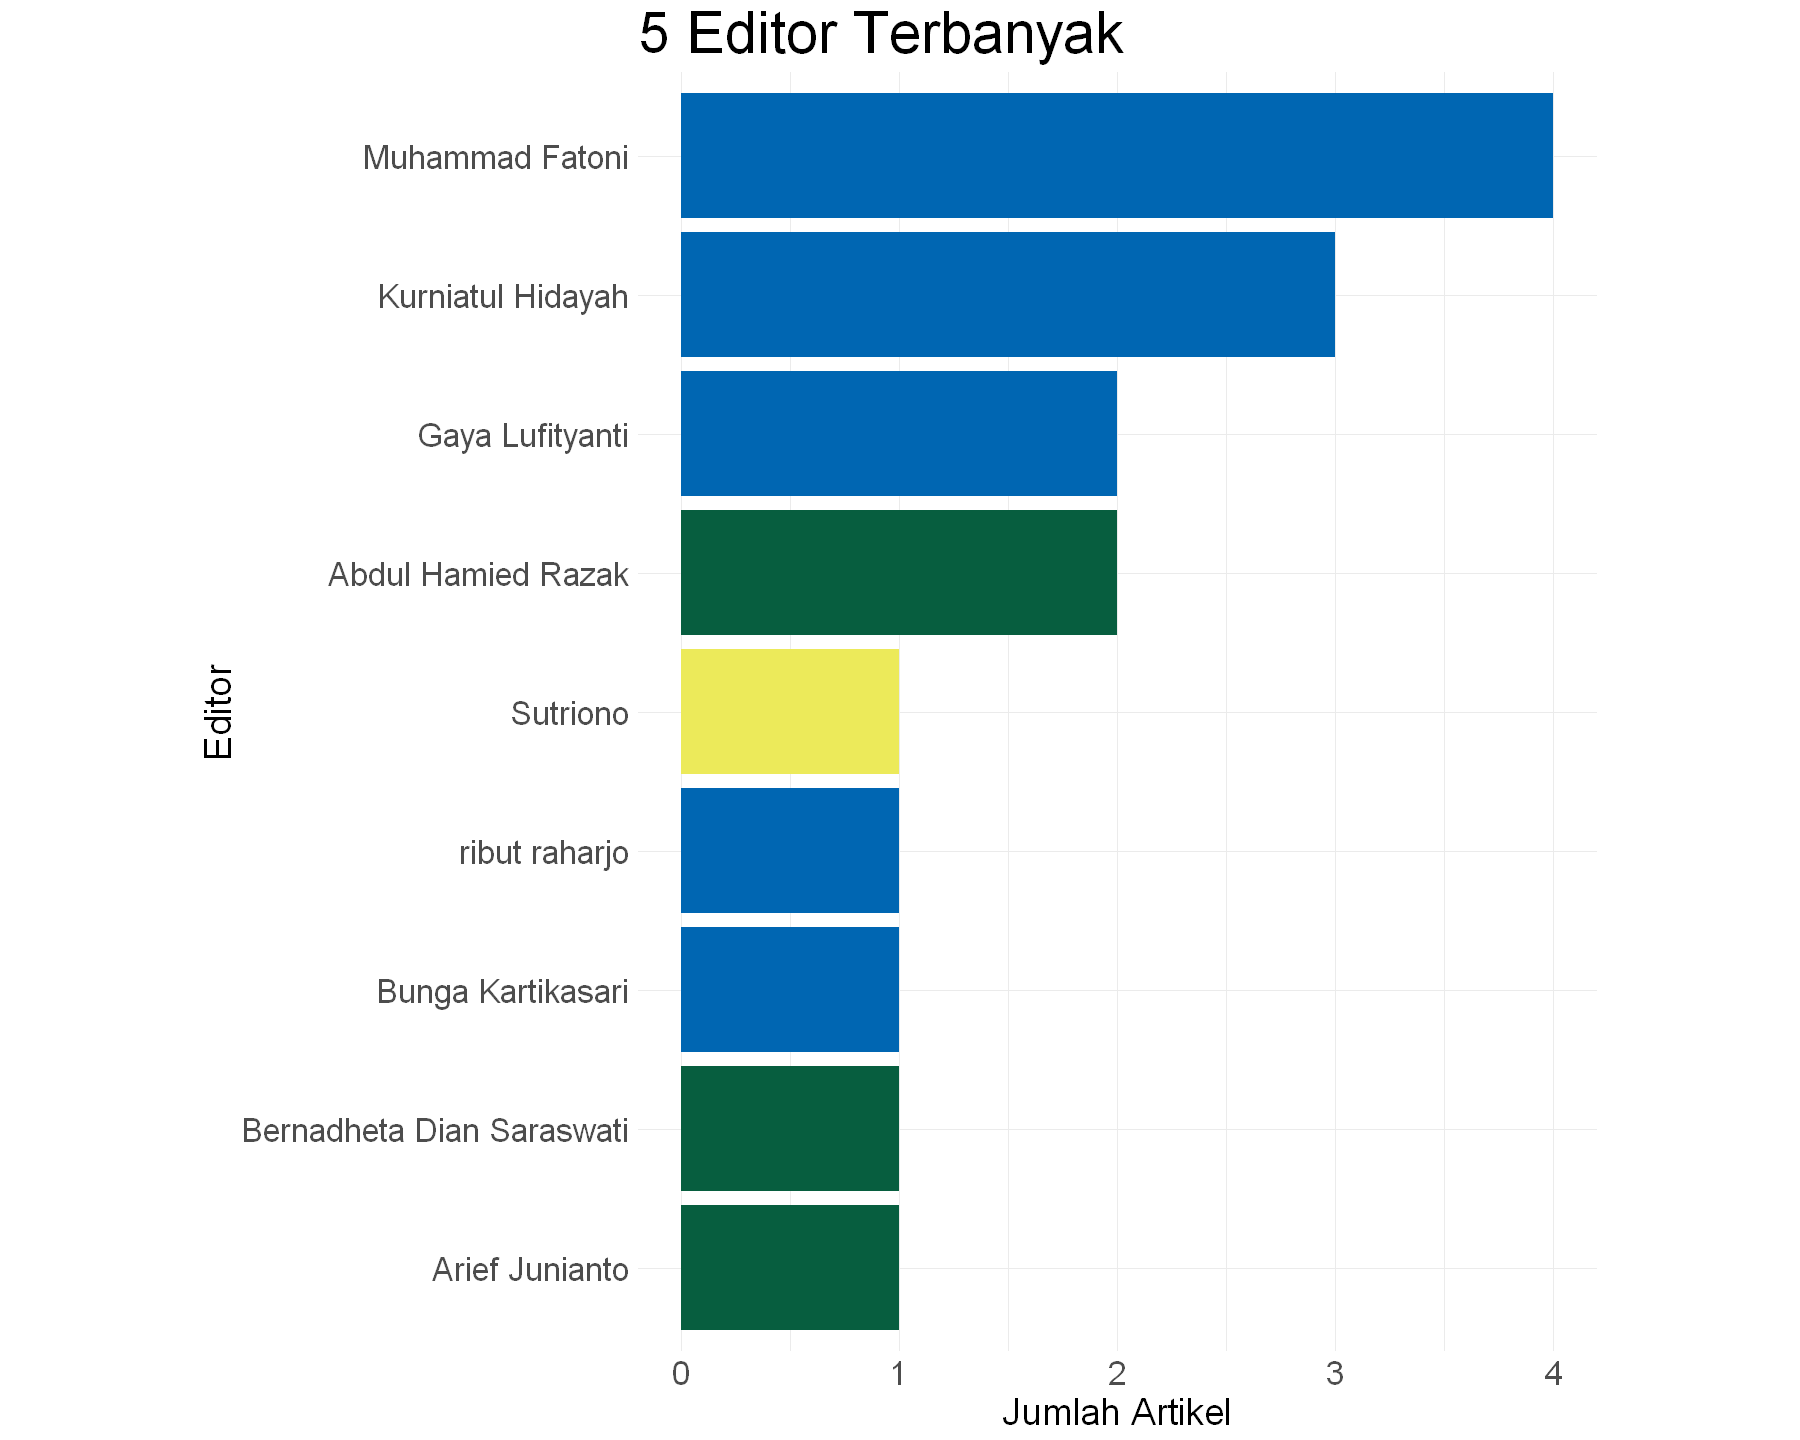

In [36]:
# Membuat horizontal bar chart dengan warna khusus pada setiap kategori kanal_berita
bar_chart <- ggplot(editor_df, aes(x = n, y = fct_reorder(Editor, n), fill = Kanal_Berita)) +
  geom_col() +
  labs(x = "Jumlah Artikel", y = "Editor", title = "5 Editor Terbanyak") +
  scale_fill_manual(values = c(Kedaulatan_Rakyat = "#CD2027", colors), guide = FALSE) +
  theme_minimal() +
  theme(
    aspect.ratio = 16/12,
    axis.text.x = element_text(size = 20),
    axis.text.y = element_text(size = 20),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 35)
  )

# Menampilkan horizontal bar chart
bar_chart

In [37]:
# Save the plot with specified dimensions
ggsave("editor_chart.png", bar_chart, width=12, height=15)

## TOP 5 Tag

In [38]:
data_tag <- data %>%
  separate_rows(Tag, sep = ", ")

In [39]:
# Menghitung frekuensi tag dari semua kanal berita
tag_counts <- data_tag %>%
  separate_rows(Tag, sep = ", ") %>%
  count(Tag) %>%
  top_n(5, n) %>%
  arrange(desc(n))


In [213]:
# Menggabungkan data frekuensi dengan informasi kanal berita dan warna
kanal_colors <- data.frame(Kanal_Berita = c("Kedaulatan Rakyat", "Tribun Jogja", "Harian Merapi"),
                           Warna = c("#CD2027", "#0066B2", "#ECEA5A"))

In [40]:
# Memfilter dataframe berdasarkan 5 tag teratas
filtered_df <- data %>%
  separate_rows(Tag, sep = ", ") %>%
  filter(Tag %in% tag_counts$Tag)

In [41]:
# Menghitung frekuensi berdasarkan lokasi dan kanal berita
bar_df <- filtered_df %>%
  group_by(Tag, Kanal_Berita) %>%
  summarise(Frekuensi = n(), .groups = 'drop') %>%
  ungroup() %>%
  head(9)

bar_df

Tag,Kanal_Berita,Frekuensi
<chr>,<chr>,<int>
Bahasa Jawa,Kedaulatan Rakyat,1
Bahasa Jawa,Tribun Jogja,1
Berita DI Yogyakarta Hari Ini,Tribun Jogja,2
Bulutangkis,Harian Merapi,1
Bulutangkis,Kedaulatan Rakyat,1
DPD RI,Kedaulatan Rakyat,1
DPD RI,Tribun Jogja,2
GKR Hemas,Harian Jogja,4
GKR Hemas,Kedaulatan Rakyat,12


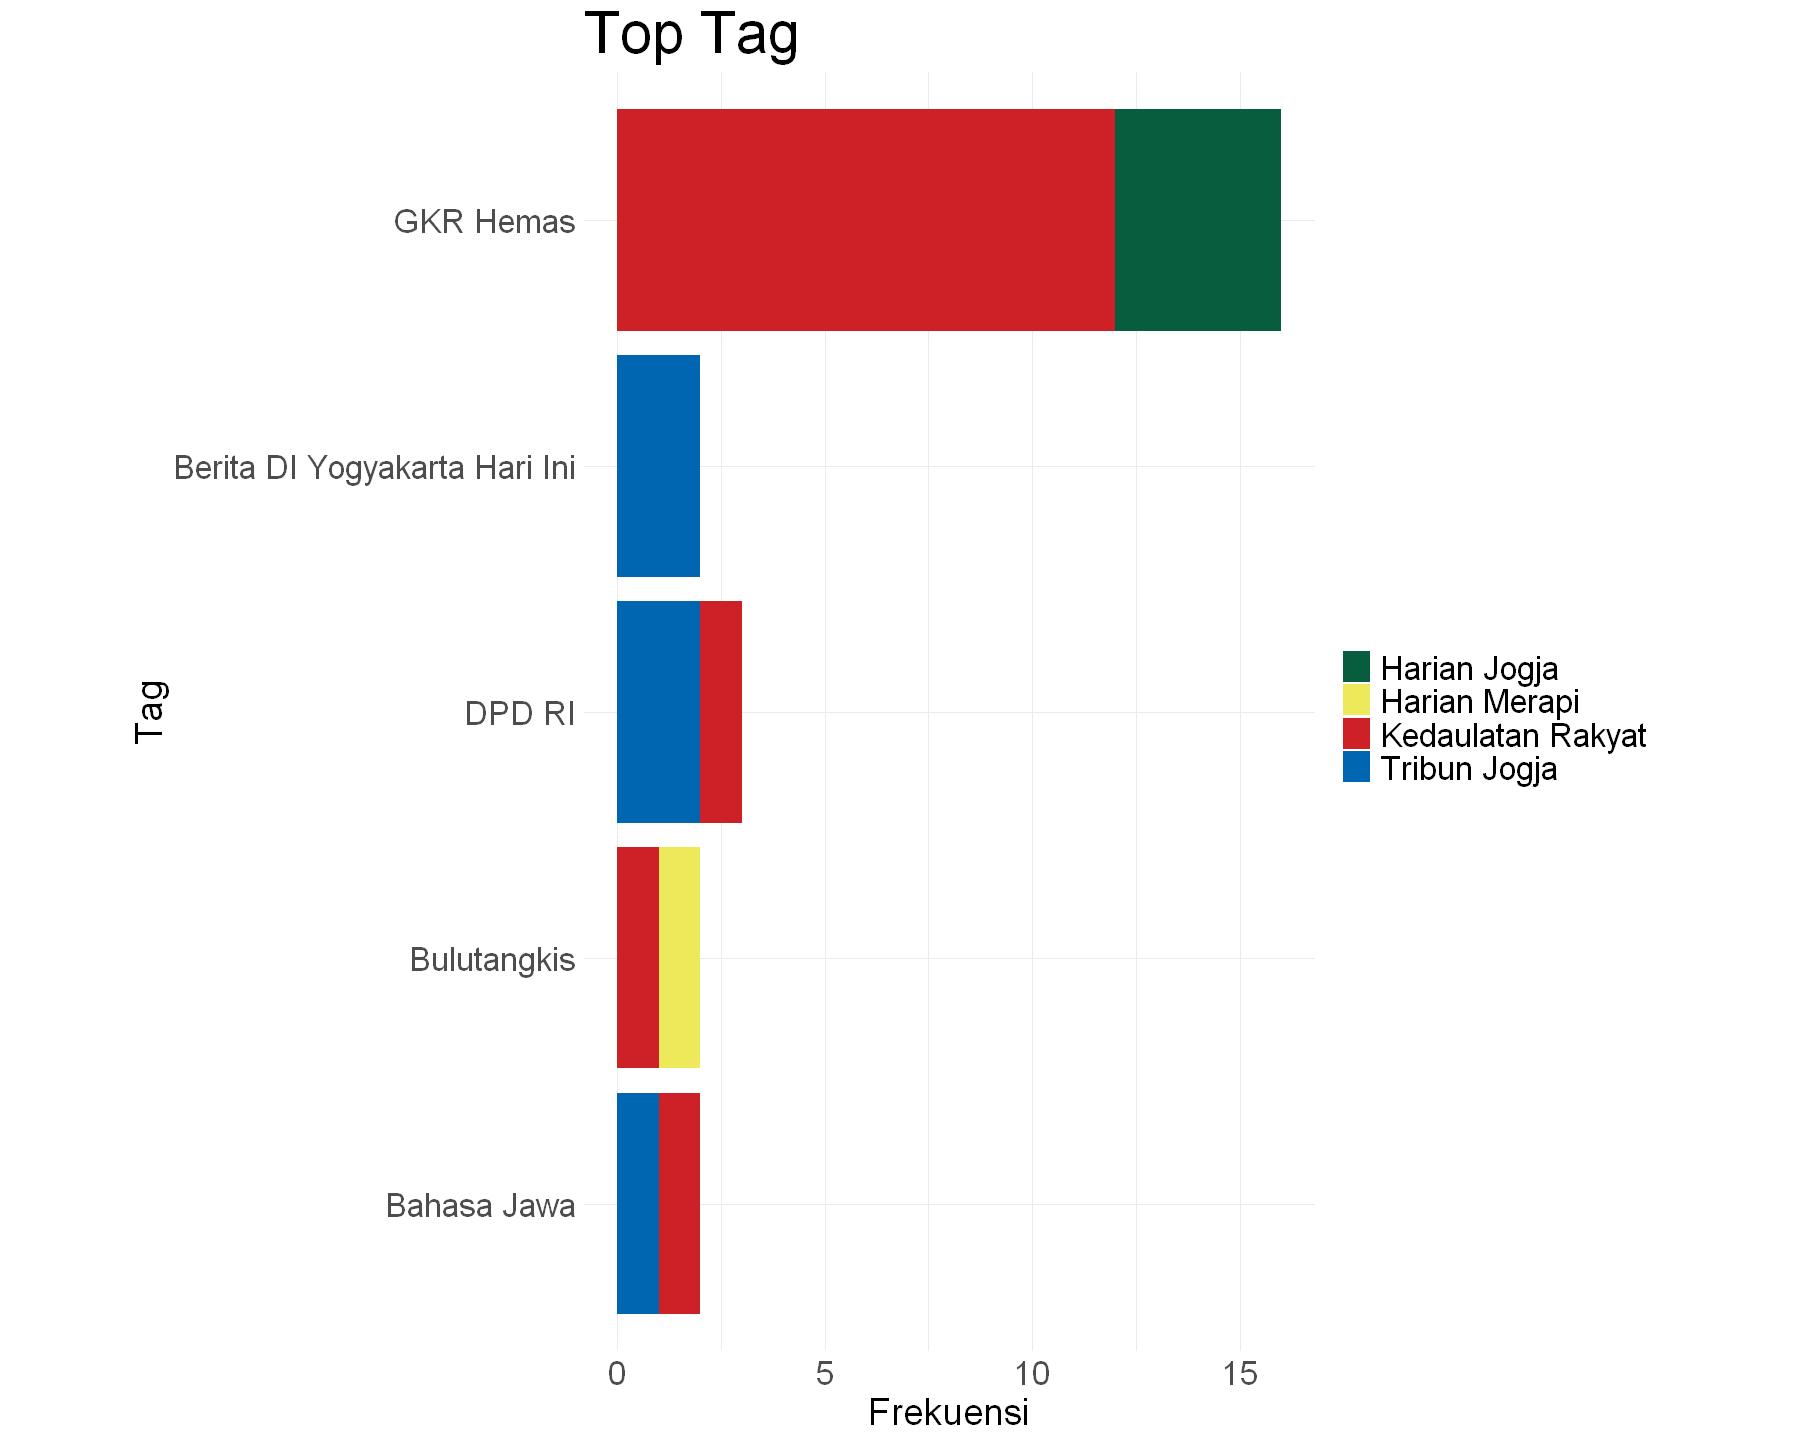

In [42]:
# Membuat stacked bar chart
bar_chart <- ggplot(bar_df, aes(x = Frekuensi, y = reorder(Tag, Frekuensi), fill = Kanal_Berita)) +
  geom_col() +
  labs(x = "Frekuensi", y = "Tag", title = "Top Tag") +
  scale_fill_manual(values = colors) +
  theme_minimal() +
  theme(
    aspect.ratio = 21/12,
    axis.text = element_text(size = 20),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 35),
    legend.title = element_blank(),
    legend.text = element_text(size = 20)
  )

bar_chart

In [43]:
# Save the plot with specified dimensions
ggsave("tag_chart.png", bar_chart, width=12, height=15)

## Wordlcloud Judul

In [44]:
# Membuat corpus dari judul
corpus <- Corpus(VectorSource(data$Konten))

In [45]:
# Menghapus tanda baca dan angka
corpus_clean <- tm_map(corpus, content_transformer(tolower))
corpus_clean <- tm_map(corpus_clean, removePunctuation)
corpus_clean <- tm_map(corpus_clean, removeNumbers)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_clean, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_clean, removeNumbers):
"transformation drops documents"


In [46]:
stopwords_id <- read_lines("data\\indonesian-stopwords-complete.txt")
myStopwords <- c(stopwords_id, c("gkr", "hemas","ajak","masuki","unggah","breaking","pastikan","miliki","datangi","penyesuaian","kangen","pastikan","bu","gusti","kanjeng","ratu","undang"))
corpus_clean <- tm_map(corpus_clean, removeWords, myStopwords)

Warning message in tm_map.SimpleCorpus(corpus_clean, removeWords, myStopwords):
"transformation drops documents"


In [47]:
# Menghitung frekuensi kata
word_freq <- TermDocumentMatrix(corpus_clean)
word_freq <- as.matrix(word_freq)
word_freq <- sort(rowSums(word_freq), decreasing = TRUE)

In [50]:
#Wordcloud
d <- data.frame(word = names(word_freq),freq=word_freq)
a <- head(d,n=100)

wc_judul <- wordcloud2(a,shape = "cloud",
            backgroundColor = "white",
            color = 'random-light' ,
            size = 1)
wc_judul

HTML widgets cannot be represented in plain text (need html)

In [51]:
topword <- head(a,10)

In [52]:
# Sort he data frame by frequency in descending order
topword <- topword[order(topword$freq, decreasing = TRUE), ]

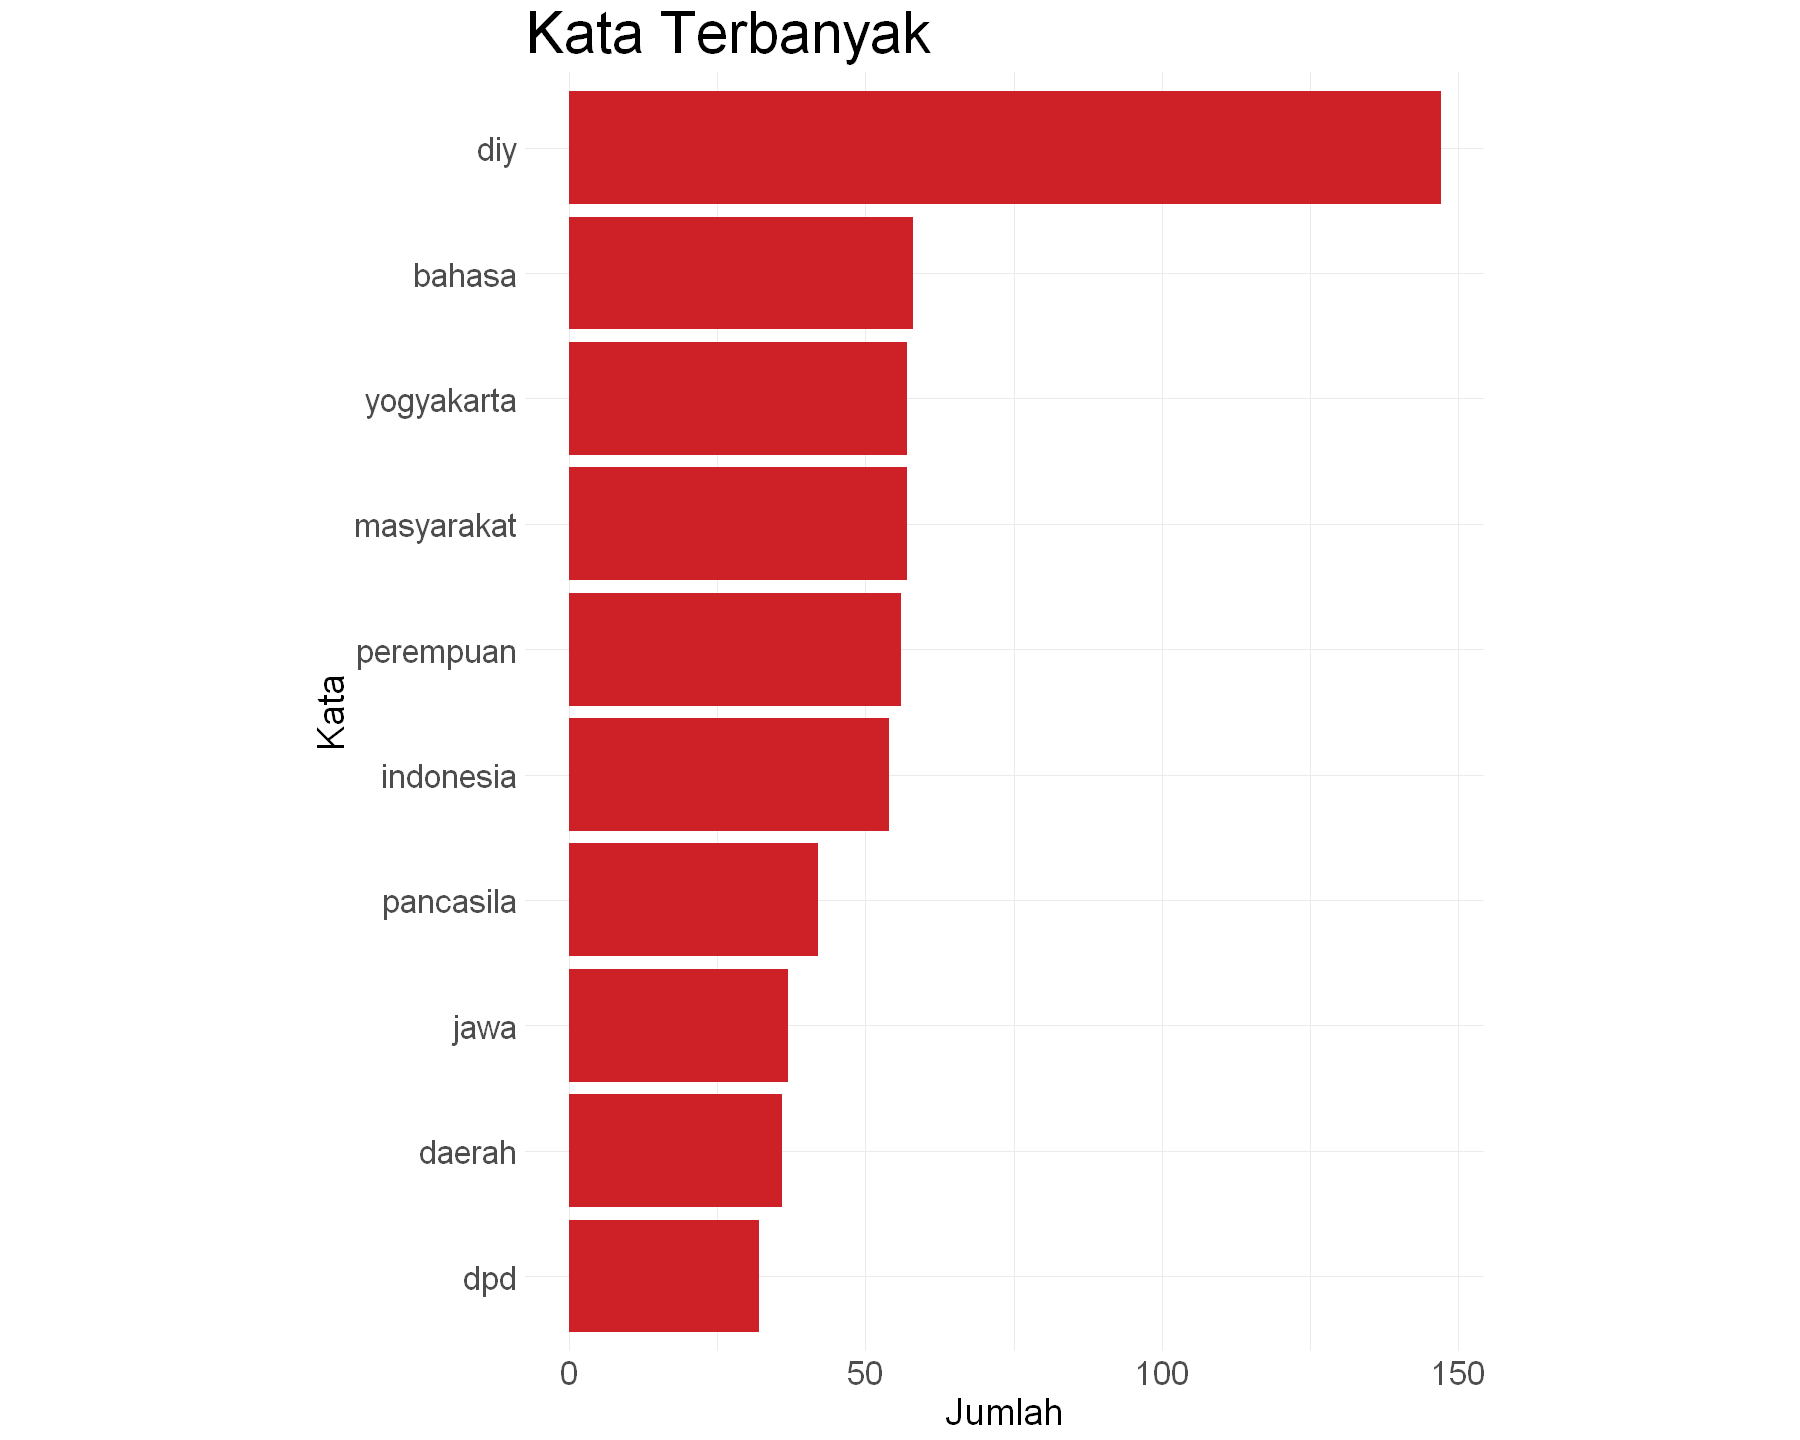

In [53]:
# Create the horizontal bar chart
bar_chart <- ggplot(topword, aes(x = freq, y = reorder(word, freq))) +
  geom_bar(stat = "identity", fill = "#CD2027") +
  labs(x = "Jumlah", y = "Kata") +
  ggtitle("Kata Terbanyak") +
  theme_minimal() +
  theme(    aspect.ratio = 16/12,
    axis.text.x = element_text(size = 20),
    axis.text.y = element_text(size = 20),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 35))

bar_chart

In [54]:
ggsave("topword_chart.png", bar_chart, width=15, height=12)

## Semantic Network Judul

In [289]:
# Membuat korpus
corpus <- Corpus(VectorSource(data$Judul))

In [290]:
# Pra-pemrosesan teks
corpus <- tm_map(corpus, content_transformer(tolower))   # Mengubah teks menjadi huruf kecil
corpus <- tm_map(corpus, removePunctuation)              # Menghapus tanda baca
corpus <- tm_map(corpus, removeNumbers)                  # Menghapus angka
corpus <- tm_map(corpus_clean, removeWords, myStopwords) # hapus stopwords
corpus <- tm_map(corpus, stripWhitespace)                # Menghapus spasi ekstra

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_clean, removeWords, myStopwords):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"


In [291]:
# Membuat matriks term-dokumen
tdm <- TermDocumentMatrix(corpus)

In [292]:
# Konversi matriks term-dokumen menjadi matriks ko-kejadian
m <- as.matrix(tdm)

In [294]:
# Menghitung matriks jarak kosinus
m <- t(m)  # Transpose matriks untuk mendapatkan matriks term-dokumen
cosine_sim <- tcrossprod(m, m) / sqrt(rowSums(m^2) %*% t(rowSums(m^2)))

In [326]:
# Membuat objek graph
g <- graph.adjacency(cosine_sim, weighted = TRUE, mode = "undirected")

IGRAPH 9776fc7 UNW- 28 64 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 9776fc7 (vertex names):
 [1] 1 --1  2 --2  3 --3  3 --4  3 --18 4 --4  4 --18 5 --5  5 --6  5 --7 
[11] 5 --21 6 --6  6 --7  6 --19 7 --7  7 --24 8 --8  8 --9  8 --12 8 --14
[21] 8 --15 8 --23 8 --25 9 --9  9 --12 9 --14 9 --15 9 --20 9 --22 9 --25
[31] 10--10 11--11 11--27 11--28 12--12 12--14 12--15 12--25 13--13 14--14
[41] 14--15 14--25 15--15 15--25 16--16 16--17 17--17 18--18 19--19 20--20
[51] 20--22 20--25 21--21 22--22 22--25 23--23 24--24 24--27 24--28 25--25
[61] 26--26 27--27 27--28 28--28

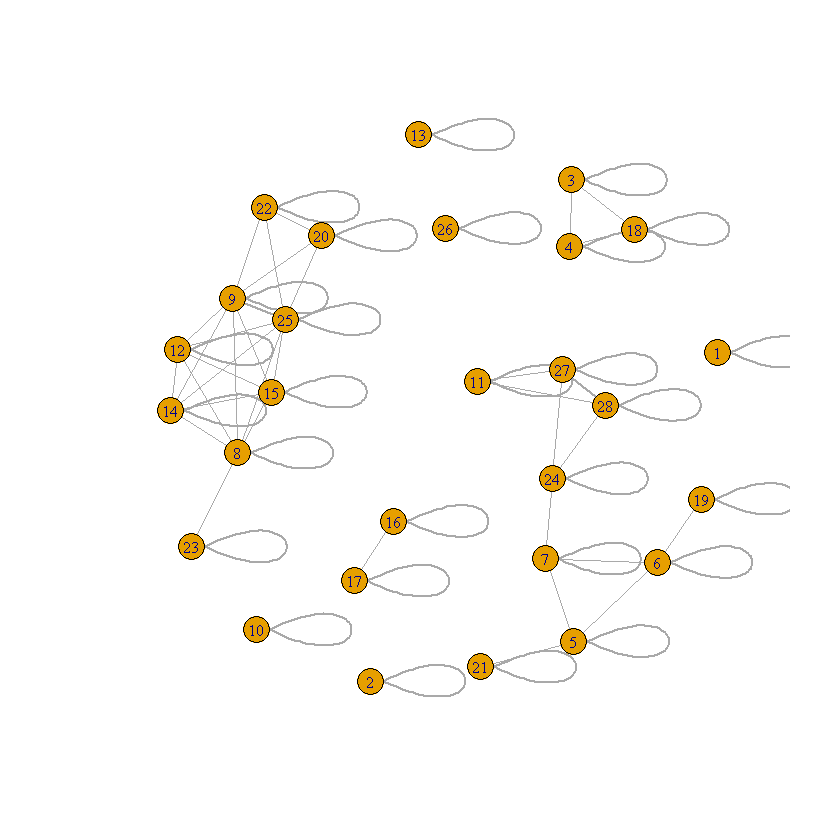

In [296]:
# Mengatur visualisasi
layout <- layout_with_fr(g)  # Menentukan tata letak (layout) jaringan

# Menampilkan jaringan semantik
plot(g, layout = layout, vertex.label = V(g)$name, vertex.size = 10, vertex.label.cex = 0.8, edge.width = E(g)$weight*2)

In [301]:
# Mengubah matriks jarak kosinus menjadi matriks numerik
cosine_sim <- as.matrix(cosine_sim)

In [302]:
# Membuat data frame dari matriks jarak kosinus
similarity_df <- data.frame(from = rownames(cosine_sim), cosine_sim)

In [303]:
# Membuat graf berdasarkan data frame
graph <- graph_from_data_frame(similarity_df, directed = FALSE)

In [320]:
# Menambahkan simpul kosong
graph <- add.vertices(graph, nv = 1, name = "0")

IGRAPH e701ef8 UN-- 32 28 -- 
+ attr: name (v/c), label (v/c), X2 (e/n), X3 (e/n), X4 (e/n), X5
| (e/n), X6 (e/n), X7 (e/n), X8 (e/n), X9 (e/n), X10 (e/n), X11 (e/n),
| X12 (e/n), X13 (e/n), X14 (e/n), X15 (e/n), X16 (e/n), X17 (e/n), X18
| (e/n), X19 (e/n), X20 (e/n), X21 (e/n), X22 (e/n), X23 (e/n), X24
| (e/n), X25 (e/n), X26 (e/n), X27 (e/n), X28 (e/n)
+ edges from e701ef8 (vertex names):
 [1] 1 --1 2 --0 3 --0 4 --0 5 --0 6 --0 7 --0 8 --0 9 --0 10--0 11--0 12--0
[13] 13--0 14--0 15--0 16--0 17--0 18--0 19--0 20--0 21--0 22--0 23--0 24--0
[25] 25--0 26--0 27--0 28--0

In [325]:
# Mengatur atribut kata pada simpul graf
V(graph)$label <- c(as.character(similarity_df$from), "0", "0","0","0")
V(graph)$word <- c(as.character(similarity_df$from), "Simpul Kosong 1", "Simpul Kosong 2", "Simpul Kosong 3","Simpul Kosong 3")
graph

IGRAPH e701ef8 UN-- 32 28 -- 
+ attr: name (v/c), label (v/c), word (v/c), X2 (e/n), X3 (e/n), X4
| (e/n), X5 (e/n), X6 (e/n), X7 (e/n), X8 (e/n), X9 (e/n), X10 (e/n),
| X11 (e/n), X12 (e/n), X13 (e/n), X14 (e/n), X15 (e/n), X16 (e/n), X17
| (e/n), X18 (e/n), X19 (e/n), X20 (e/n), X21 (e/n), X22 (e/n), X23
| (e/n), X24 (e/n), X25 (e/n), X26 (e/n), X27 (e/n), X28 (e/n)
+ edges from e701ef8 (vertex names):
 [1] 1 --1 2 --0 3 --0 4 --0 5 --0 6 --0 7 --0 8 --0 9 --0 10--0 11--0 12--0
[13] 13--0 14--0 15--0 16--0 17--0 18--0 19--0 20--0 21--0 22--0 23--0 24--0
[25] 25--0 26--0 27--0 28--0

Warning message in geom_node_text(aes(label = label, subtitle = word), nudge_x = 0.1, :
"Ignoring unknown aesthetics: subtitle"


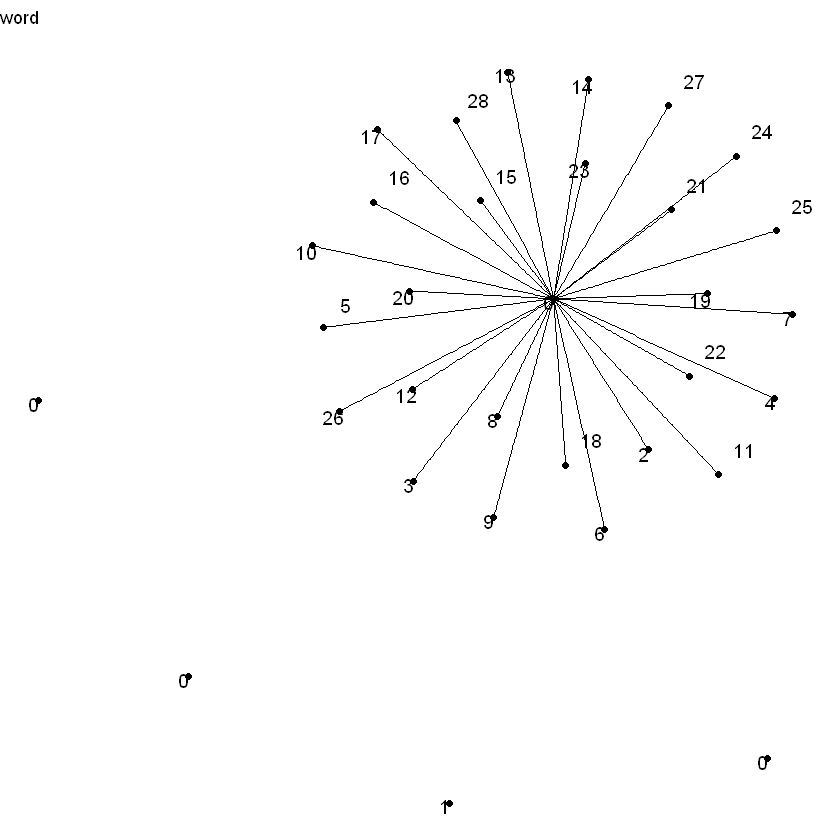

In [324]:
# Memvisualisasikan jaringan semantik
plot <- ggraph(graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point() +
  geom_node_text(aes(label = label, subtitle = word), nudge_x = 0.1, nudge_y = 0.1, size = 4, repel = TRUE) +
  theme_void()

# Menampilkan plot
plot

##  Modified Collin and Quillian Model	

In [481]:
corpus <- Corpus(VectorSource(data$Konten))

In [482]:
# Pra-pemrosesan teks
corpus <- tm_map(corpus, content_transformer(tolower))   # Mengubah teks menjadi huruf kecil
corpus <- tm_map(corpus, removePunctuation)              # Menghapus tanda baca
corpus <- tm_map(corpus, removeNumbers)                  # Menghapus angka
corpus <- tm_map(corpus_clean, removeWords, myStopwords) # hapus stopwords
corpus <- tm_map(corpus, stripWhitespace)      

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_clean, removeWords, myStopwords):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"


In [483]:
# Create a document-term matrix
dtm <- DocumentTermMatrix(corpus)

In [484]:
# Convert the document-term matrix to a co-occurrence matrix
co_matrix <- t(as.matrix(dtm)) %*% as.matrix(dtm)

In [485]:
# Make the co-occurrence matrix symmetric
co_matrix <- (co_matrix + t(co_matrix)) / 2

In [486]:
# Convert the co-occurrence matrix to a dense matrix
co_matrix <- as.matrix(co_matrix)

In [487]:
# Check if the matrix is symmetric
if (!isSymmetric(co_matrix)) {
  co_matrix <- forceSymmetric(co_matrix)
}
# Convert the co-occurrence matrix to an adjacency matrix
adj_matrix <- ifelse(co_matrix > 0, 1, 0)

In [488]:
# Convert the adjacency matrix to an igraph graph
network <- graph_from_adjacency_matrix(adj_matrix, mode = "undirected", weighted = TRUE)
network

IGRAPH 427a28f UNW- 147 672 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 427a28f (vertex names):
 [1] digital--digital   digital--karang    digital--kreatif   digital--ruang    
 [5] digital--sleman    digital--taruna    karang --karang    karang --kreatif  
 [9] karang --ruang     karang --sleman    karang --taruna    kreatif--kreatif  
[13] kreatif--ruang     kreatif--sleman    kreatif--taruna    ruang  --ruang    
[17] ruang  --sleman    ruang  --taruna    sleman --sleman    sleman --taruna   
[21] taruna --taruna    gambuh --gambuh    gambuh --gedung    gambuh --geriatric
[25] gambuh --idaman    gambuh --layanan   gambuh --resmikan  gambuh --rsu      
[29] gambuh --sakina    gambuh --terpadu   gedung --gedung    gedung --geriatric
+ ... omitted several edges

In [489]:
# Convert the igraph graph to a ggraph object
g <- as_tbl_graph(network)
g


# A tbl_graph: 147 nodes and 672 edges
#
# An undirected multigraph with 9 components
#
# A tibble: 147 × 1
  name   
  <chr>  
1 digital
2 karang 
3 kreatif
4 ruang  
5 sleman 
6 taruna 
# ℹ 141 more rows
#
# A tibble: 672 × 3
   from    to weight
  <int> <int>  <dbl>
1     1     1      1
2     1     2      1
3     1     3      1
# ℹ 669 more rows

In [500]:
# Filter edges with weight > 3
filtered_edges <- E(g)[E(g)$weight >= 10]

# Create a new graph with filtered edges
filtered_graph <- delete_edges(g, E(g) - filtered_edges)
filtered_graph

IGRAPH b636513 UNW- 147 672 -- 
+ attr: name (v/c), weight (e/n)
+ edges from b636513 (vertex names):
 [1] digital--digital   digital--karang    digital--kreatif   digital--ruang    
 [5] digital--sleman    digital--taruna    karang --karang    karang --kreatif  
 [9] karang --ruang     karang --sleman    karang --taruna    kreatif--kreatif  
[13] kreatif--ruang     kreatif--sleman    kreatif--taruna    ruang  --ruang    
[17] ruang  --sleman    ruang  --taruna    sleman --sleman    sleman --taruna   
[21] taruna --taruna    gambuh --gambuh    gambuh --gedung    gambuh --geriatric
[25] gambuh --idaman    gambuh --layanan   gambuh --resmikan  gambuh --rsu      
[29] gambuh --sakina    gambuh --terpadu   gedung --gedung    gedung --geriatric
+ ... omitted several edges

In [501]:
# Compute the Fruchterman-Reingold layout
layout <- layout_with_fr(filtered_graph)

# Increase the repulsion by adjusting the layout manually
layout <- layout * 100


In [502]:
node_distance <- 100

# Adjust the distance between nodes in the layout
layout_adjusted <- layout + node_distance


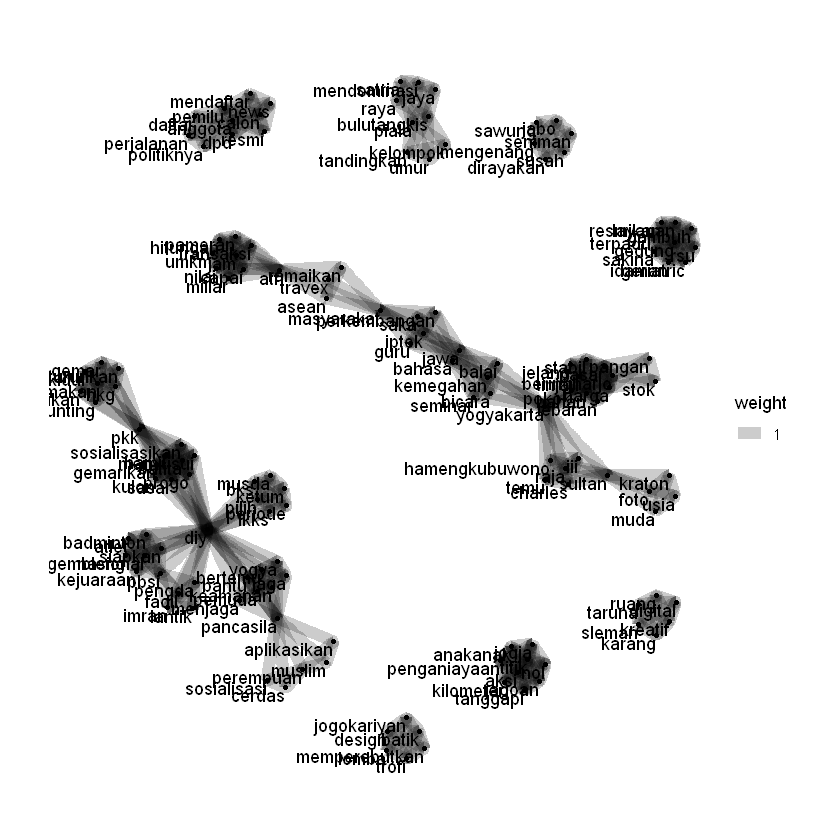

In [503]:
ggraph(filtered_graph, layout = layout_adjusted) +
  geom_edge_link(aes(width = weight), alpha = 0.2) +
  geom_node_point(size = 1) +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
  theme_void() +
  theme(plot.margin = margin(1, 1, 1, 1, "cm")) +
  coord_fixed()

In [461]:
# Convert filtered_graph to a format suitable for NetworkD3
nodes <- data.frame(id = V(filtered_graph)$name, group = 1, stringsAsFactors = FALSE)
links <- as.data.frame(get.edgelist(filtered_graph), stringsAsFactors = FALSE)
names(links) <- c("source", "target")

In [514]:
# Create NetworkD3 plot
#net <- forceNetwork(Links = links, Nodes = nodes, Source = "source", Target = "target",
 #                   NodeID = "id", Group = "group", width = 800, height = 600)

# Render the graph using htmlwidgets
#net_widget <- htmlwidgets::onRender(net, "document.getElementById('graphDiv')")

# Generate HTML code for the graph
#graph_html <- as.character(tags$div(id = "graphDiv", net_widget))

# Display the graph in the notebook
#display_html(graph_html)

## Network Diagram For content

In [55]:
data_bigram <- data
data_bigram

Judul                                                                                              
1  GKR Hemas Ajak Karang Taruna Sleman Kreatif di Ruang Digital                                       
2  GKR Hemas Resmikan Gedung Gambuh RSU Sakina Idaman, Ini Layanan Terpadu Geriatric                  
3  GKR Hemas Kembali Daftar Jadi Anggota DPD RI pada Pemilu 2024, Begini Perjalanan Politiknya        
4  BREAKING NEWS : GKR Hemas Resmi Mendaftar Jadi Calon Anggota DPD RI pada Pemilu 2024               
5  Raja Charles III Ternyata Pernah ke Yogyakarta, Temu Kangen dengan Sultan Hamengkubuwono X         
6  Tinjau Pasar Beringharjo Yogyakarta, GKR Hemas Pastikan Harga Bahan Pokok Stabil Jelang Lebaran    
7  GKR Hemas Bicara Soal Kemegahan Bahasa Jawa dalam Seminar Bersama Balai Bahasa Yogyakarta          
8  TP PKK DIY Sosialisasikan Gemarikan di Kulon Progo, Sasar Ibu Hamil, Menyusui dan Miliki Batita    
9  Bertemu GKR Hemas, Pemuda Pancasila DIY Diminta Bantu Menjaga Keamanan                             
10 Tanggapi Aksi Penganiayaan di Titik Nol Kilometer Jogja, GKR Hemas: Anak-Anak Ini Ingin Jadi Jagoan
11 Dalam Hitungan Jam Nilai Transaksi Pameran UMKM ATF 2023 Capai Rp 1,4 Miliar                       
12 Siapkan Kejuaraan Badminton Nasional, PBSI DIY Gembleng Atlet Sejak Dini                           
13 Memperebutkan Trofi GKR Hemas, Lomba Design Batik Jogokariyan                                      
14 Musda LKKS 'BK3S' DIY Pilih GKR Hemas Ketum Periode 2023-2028                                      
15 Fadil Imran Lantik Pengda PBSI DIY                                                                 
16 Jaya Raya Satria Mendominasi Bulutangkis Piala GKR Hemas 2023                                      
17 Bulutangkis Piala GKR Hemas Tandingkan Semua Kelompok Umur                                         
18 GKR Hemas Kembali Mendaftar Sebagai Anggota DPD RI                                                 
19 Pastikan Stok dan Harga Pangan, GKR Hemas Datangi Pasar Beringharjo                                
20 Sosialisasi Pancasila, GKR Hemas: Perempuan Cerdas, Perempuan Pancasila                            
21 Sultan Masuki Usia 77 Tahun, Kraton Unggah Foto Masa Muda bersama GKR Hemas                        
22 GKR Hemas ajak Perempuan Muslim Aplikasikan Pancasila                                              
23 Hari HKG PKK ke-51 Gunungkidul, GKR Hemas: Gemar Makan Ikan Turunkan Stunting                      
24 Bahasa Jawa Saka Guru Penyesuaian Masyarakat Terhadap Perkembangan Iptek                           
25 Bertemu GKR Hemas, Pemuda Pancasila DIY Diminta Bantu Jaga Keamanan Yogya                          
26 Dirayakan Seniman, Sawung Jabo Mengenang Saat Susah                                                
27 GKR Hemas Ajak Masyarakat ASEAN Ramaikan Travex ATF 2023                                           
28 GKR Hemas Ajak Masyarakat Ramaikan TRAVEX ATF 2023                                                 
29 Datangi KPU DIY, GKR Hemas Serahkan Berkas Pendaftaran Calon Anggota DPD RI                        
30 GKR Hemas Ingin Masyarakat Setop Pakai Istilah Klitih                                              
31 GKR Hemas: Perempuan Jogja, Cerdas dan Berkarakter Pancasila                                       
32 GKR Hemas Ajak Perempuan Muslim Mengamalkan Pancasila                                              
   Konten                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [56]:
data_bigram$Konten <- as.vector(data_bigram$Konten)

In [57]:
bi.gram.words <- data_bigram %>% 
  unnest_tokens(
    input = Konten, 
    output = bigram, 
    token = 'ngrams', 
    n = 2
  ) %>% 
  filter(! is.na(bigram))

In [58]:
bi.gram.words %>% 
  select(bigram) %>% 
  head(10)

bigram
<chr>
gusti kanjeng
kanjeng ratu
ratu hemas
hemas mengajak
mengajak generasi
generasi muda
muda karang
karang taruna
taruna kabupaten


In [59]:
bi.gram.words %<>% 
  separate(col = bigram, into = c('word1', 'word2'), sep = ' ') %>% 
  filter(! word1 %in% myStopwords) %>% 
  filter(! word2 %in% myStopwords) %>% 
  filter(! is.na(word1)) %>% 
  filter(! is.na(word2)) %>% 
  filter(! grepl("\\d", word1)) %>% 
  filter(! grepl("\\d", word2))

In [60]:
bi.gram.count <- bi.gram.words %>% 
  count(word1, word2, sort = TRUE) %>% 
  # We rename the weight column so that the 
  # associated network gets the weights (see below).
  rename(weight = n)

word1,word2,weight
<chr>,<chr>,<int>
bahasa,jawa,31
dpd,ri,26
pemuda,pancasila,25
pangeran,charles,23
anggota,dpd,18
pancasila,diy,17


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


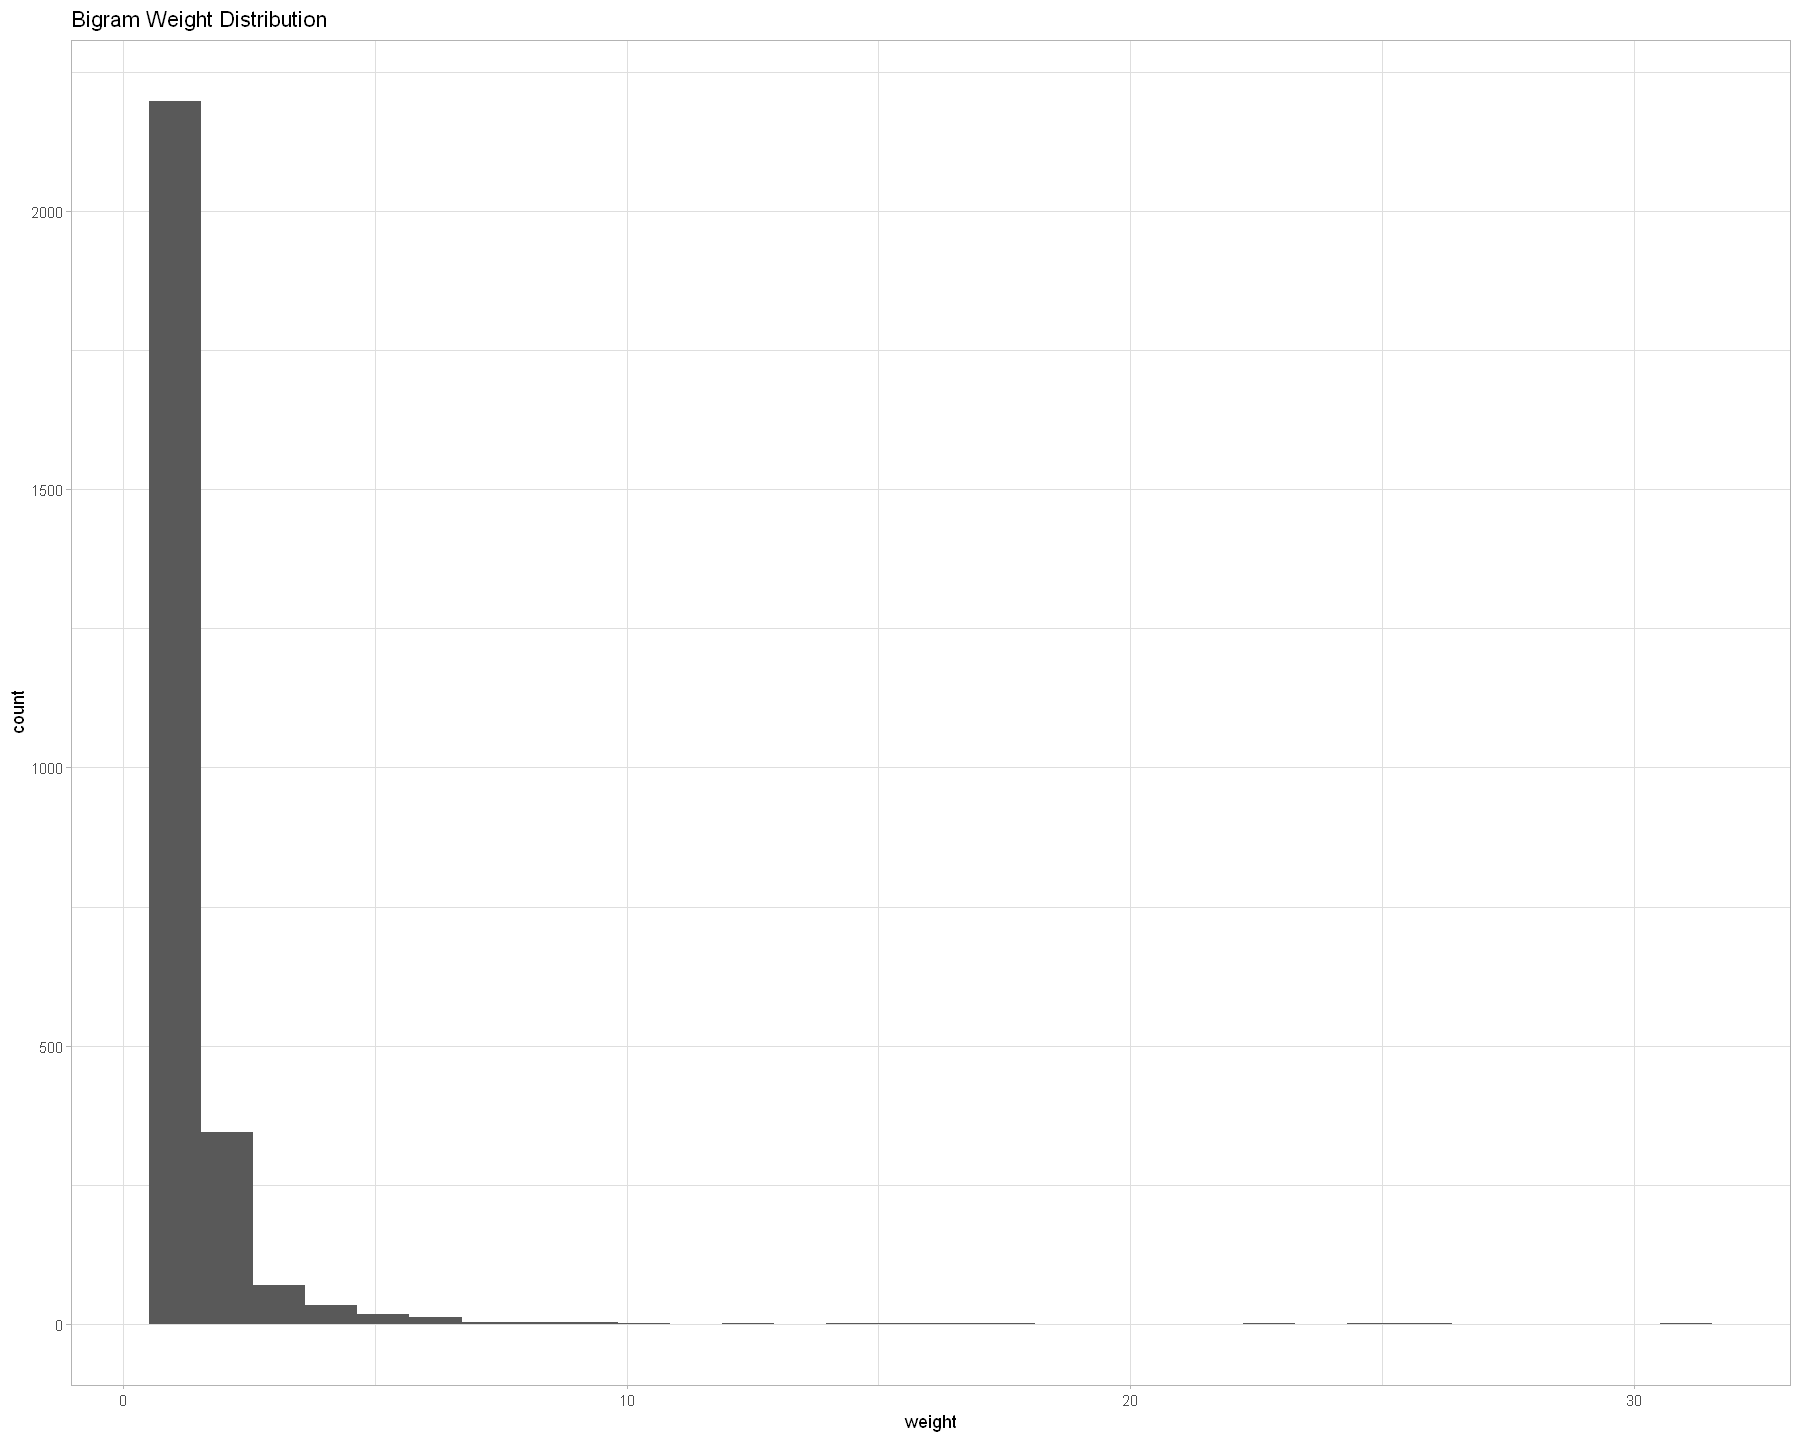

In [61]:
bi.gram.count %>% head()

bi.gram.count %>% 
  ggplot(mapping = aes(x = weight)) +
  theme_light() +
  geom_histogram() +
  labs(title = "Bigram Weight Distribution")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


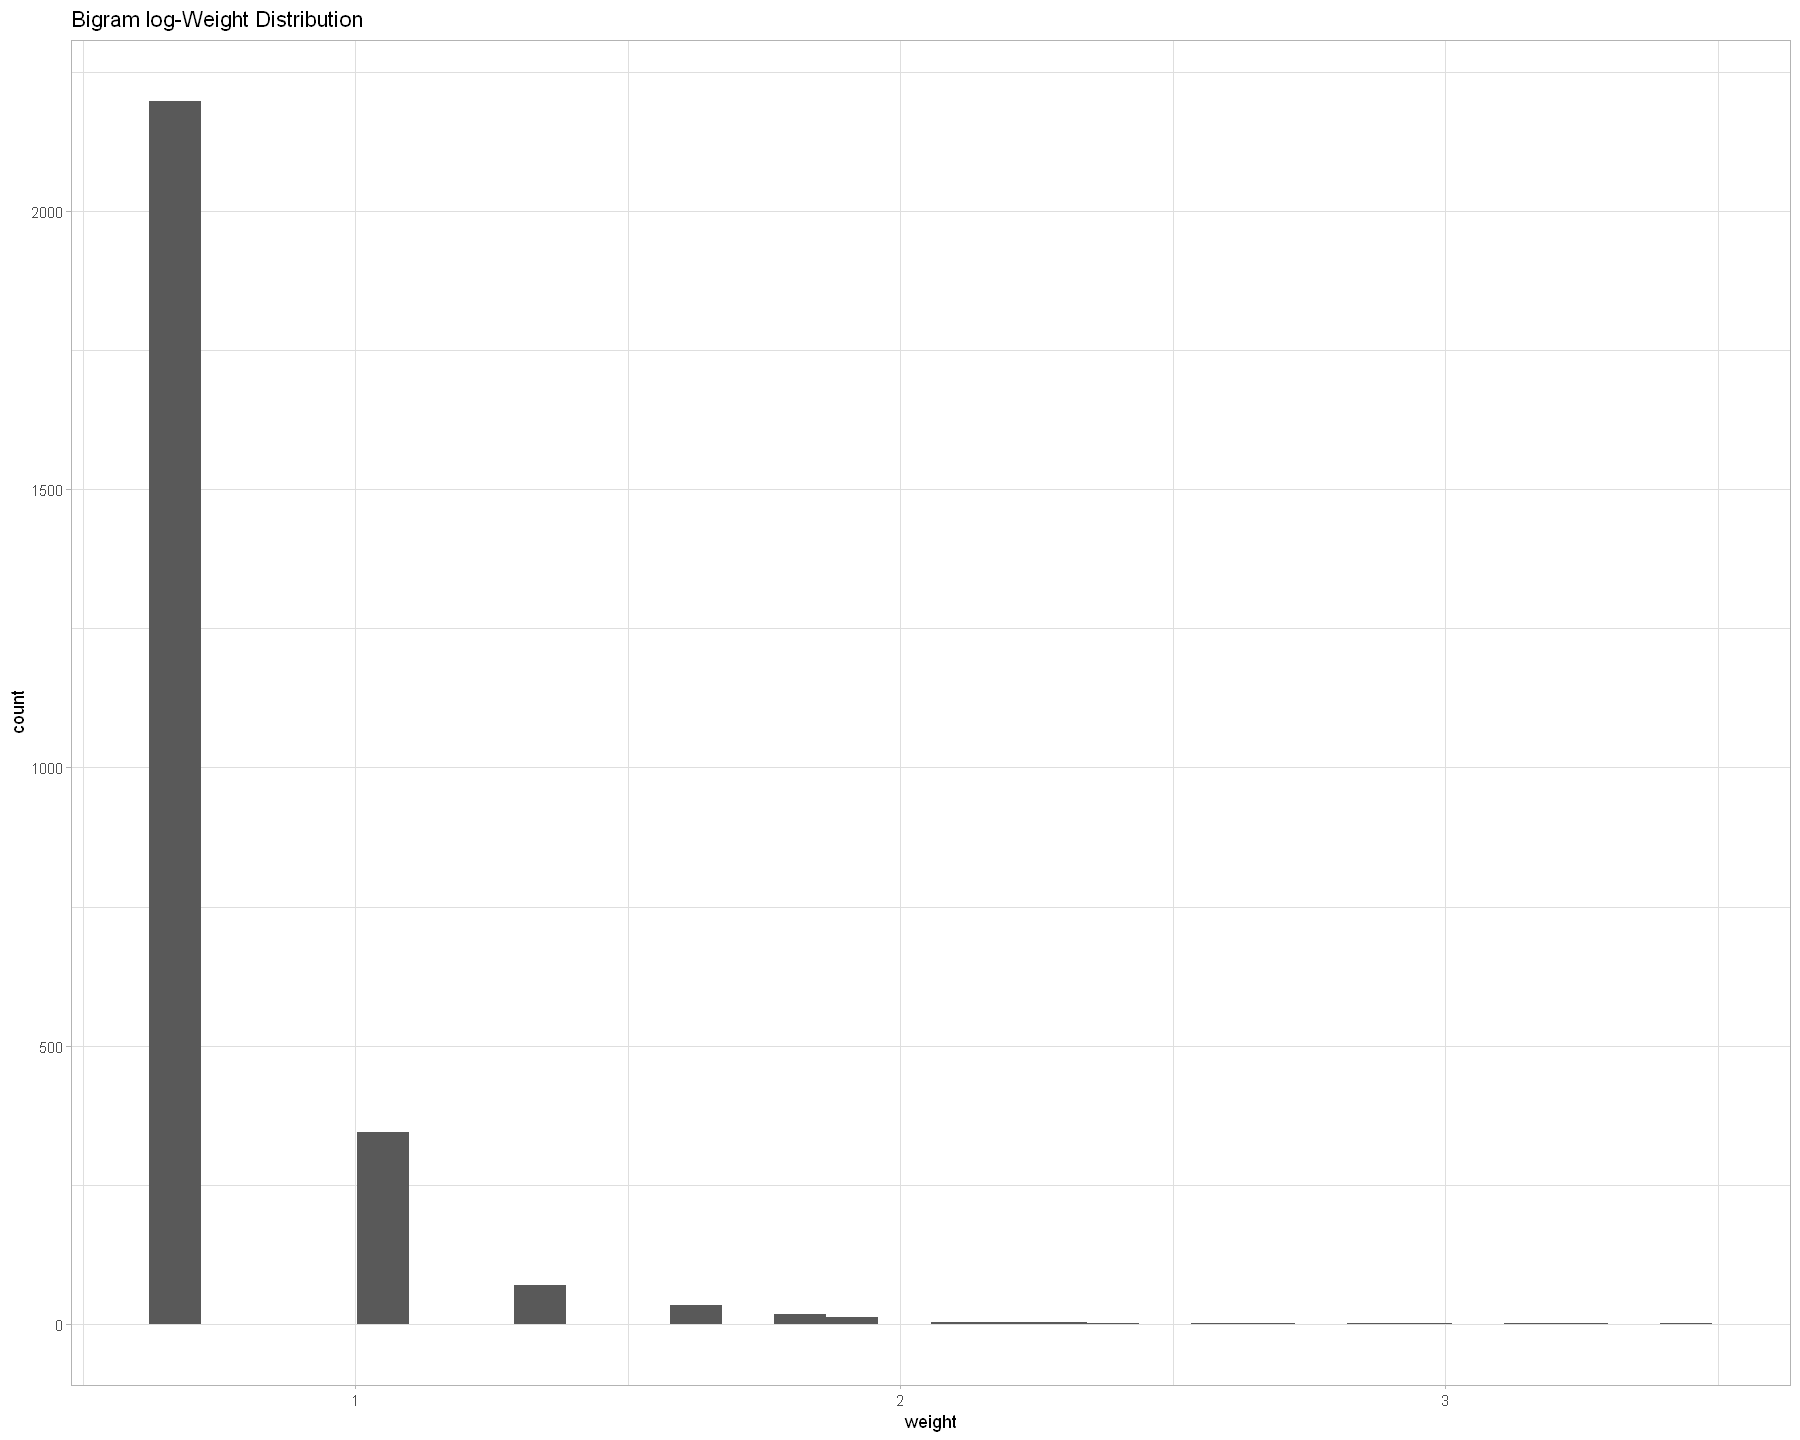

In [62]:

bi.gram.count %>% 
  mutate(weight = log(weight + 1)) %>% 
  ggplot(mapping = aes(x = weight)) +
  theme_light() +
  geom_histogram() +
  labs(title = "Bigram log-Weight Distribution")

In [63]:
threshold <- 5

# For visualization purposes we scale by a global factor. 
ScaleWeight <- function(x, lambda) {
  x / lambda
}

In [64]:
network <-  bi.gram.count %>%
  filter(weight > threshold) %>%
  mutate(weight = ScaleWeight(x = weight, lambda = 2E3)) %>% 
  graph_from_data_frame(directed = FALSE)


network
is.weighted(network)

IGRAPH 31514d3 UNW- 55 35 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 31514d3 (vertex names):
 [1] bahasa   --jawa        dpd      --ri          pemuda   --pancasila  
 [4] pangeran --charles     dpd      --anggota     pancasila--diy        
 [7] pbsi     --diy         faried   --jayen       sri      --sultan     
[10] peran    --perempuan   sultan   --hb          atlet    --bulutangkis
[13] anggota  --calon       hb       --x           kraton   --yogyakarta 
[16] karang   --taruna      kenakalan--remaja      makan    --ikan       
[19] putri    --diana       anak     --anak        kabupaten--sleman     
[22] pbsi     --pengurus    sakina   --idaman      atlet    --atlet      
+ ... omitted several edges

[1] TRUE

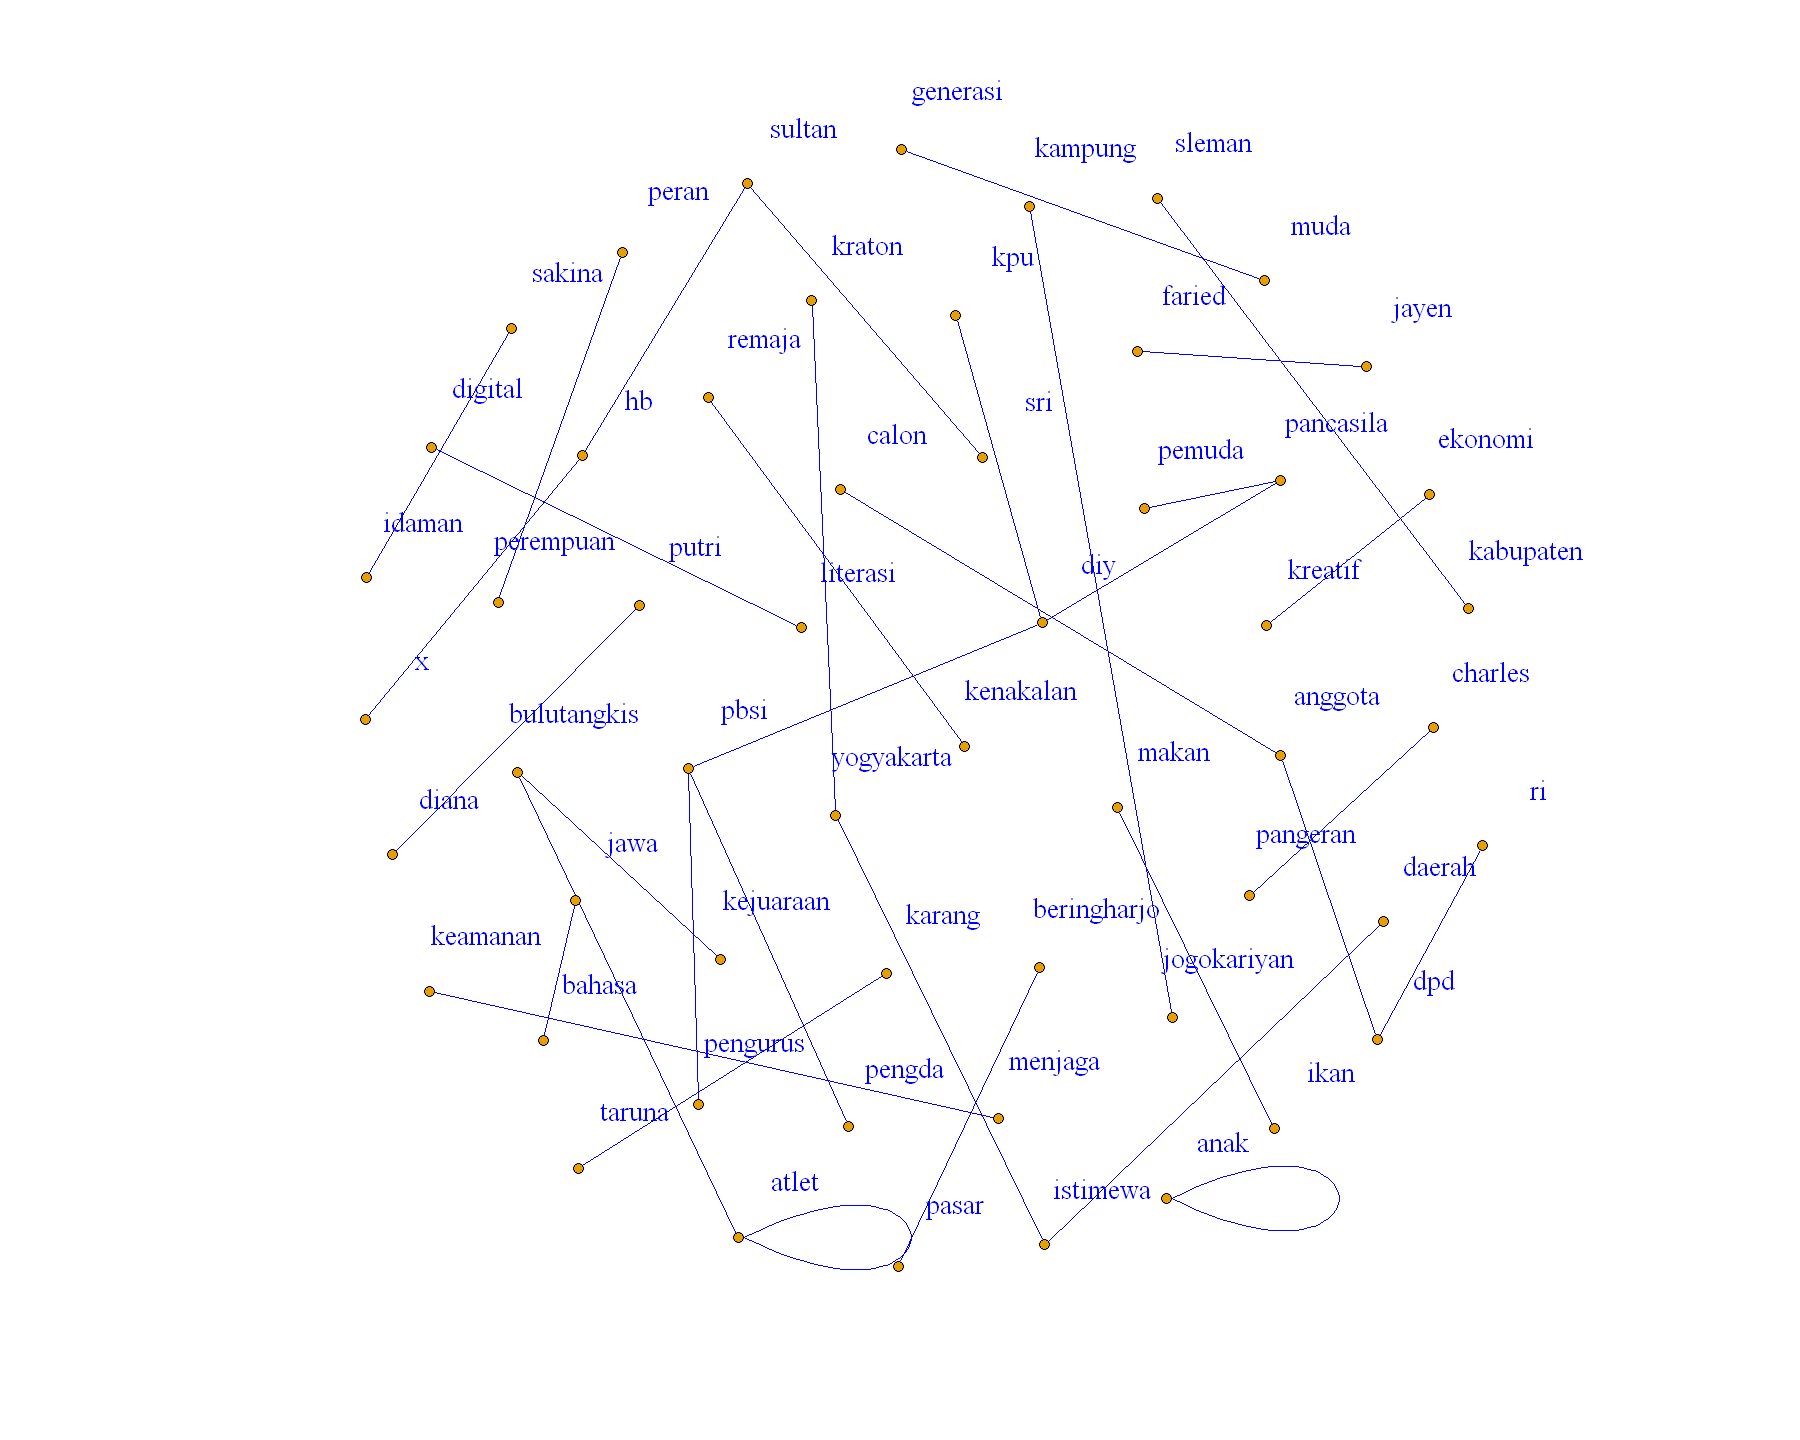

In [65]:
plot(
  network, 
  vertex.size = 2,
  vertex.label.color = "blue", 
  vertex.label.cex = 1.4, 
  vertex.label.dist = 2,
  edge.color = 'blue', 
  #sub = glue('Weight Threshold: {threshold}'), 
  alpha = 50
)

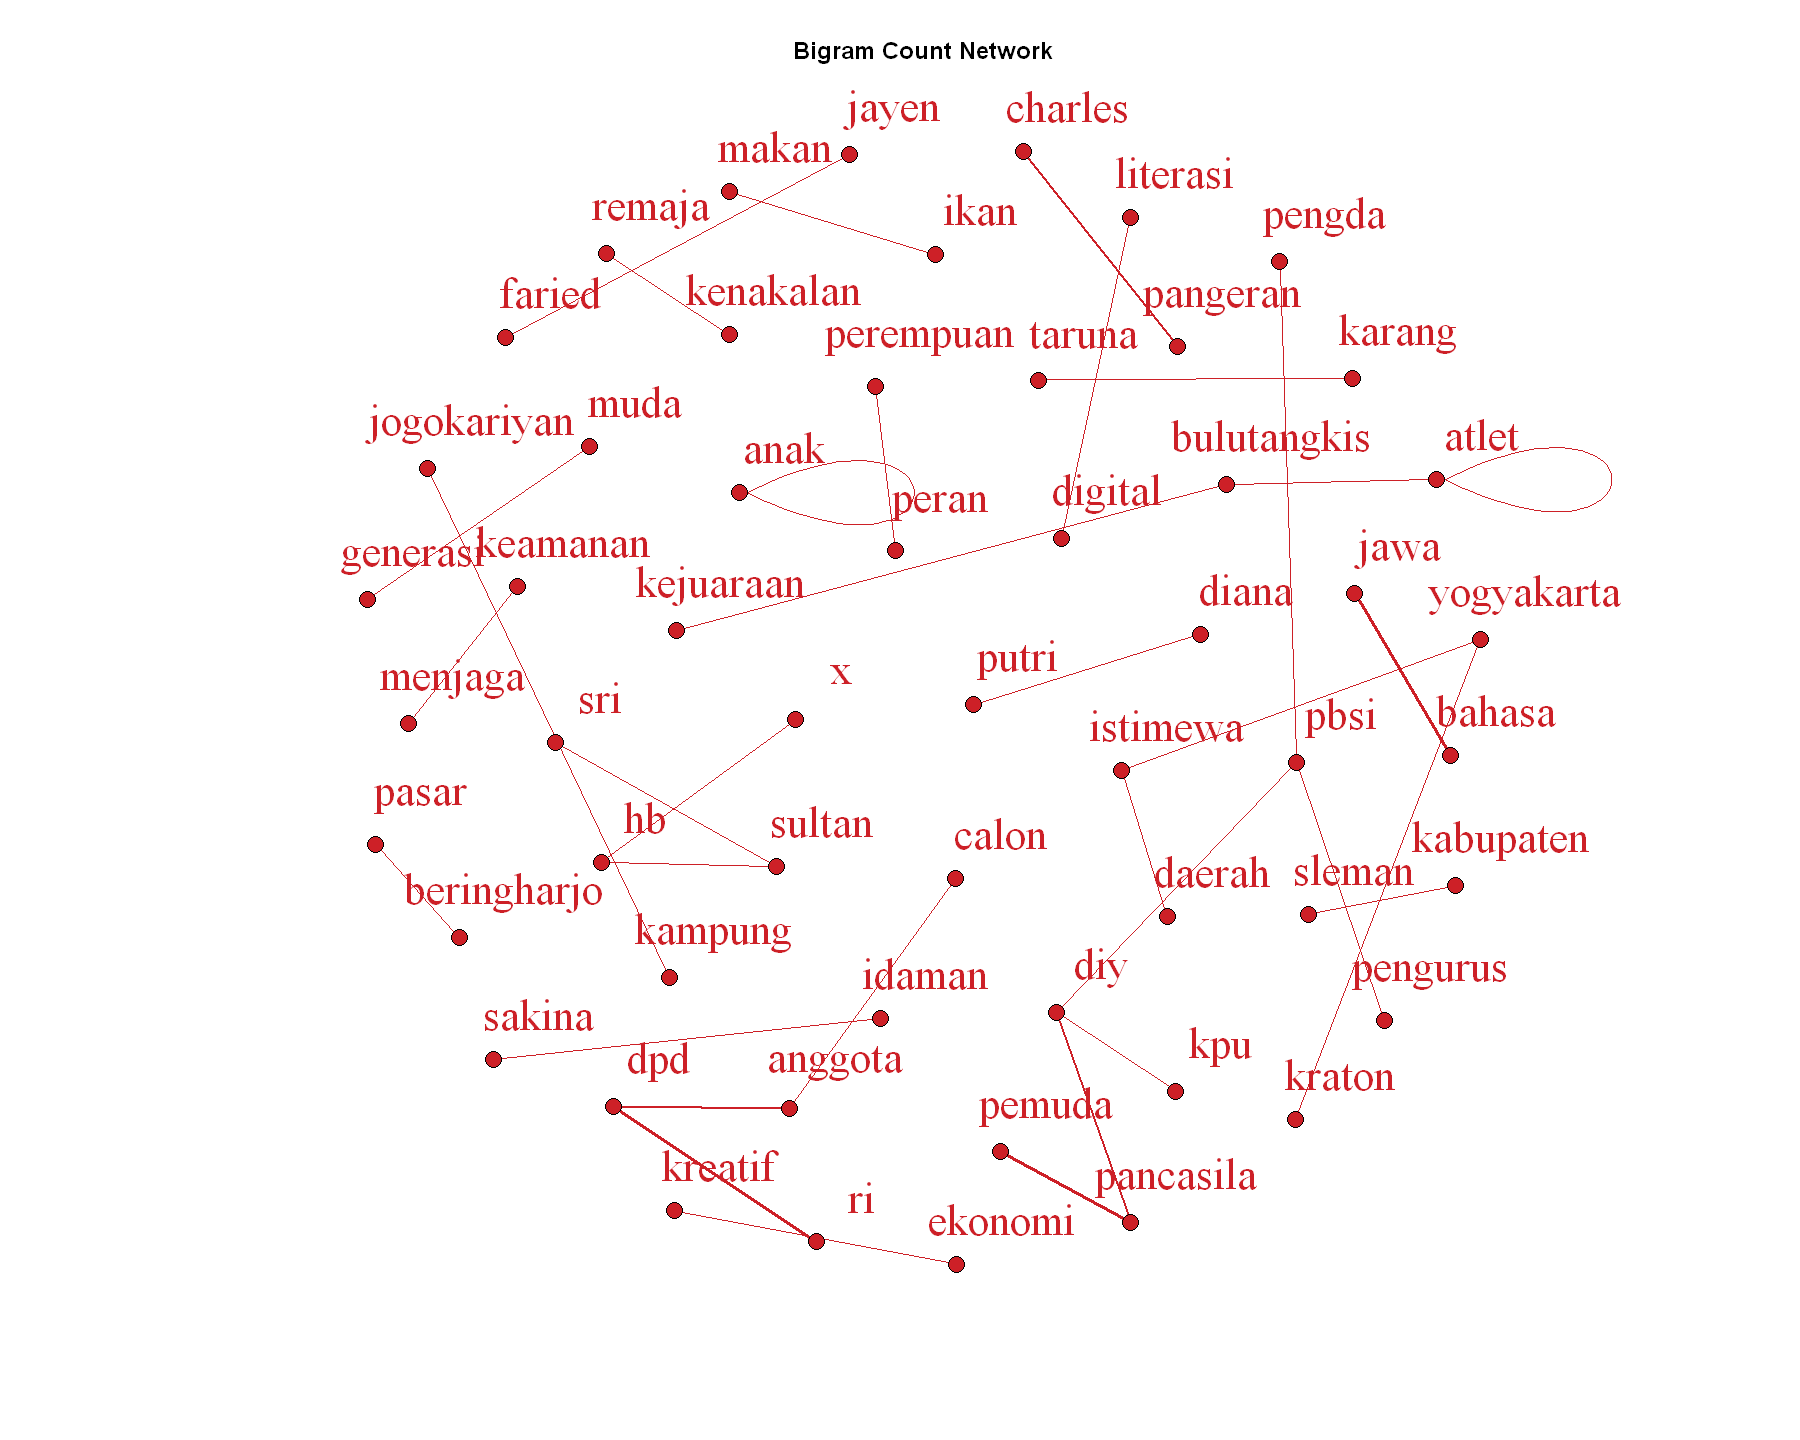

In [66]:

# Store the degree.
V(network)$degree <- strength(graph = network)

# Compute the weight shares.
E(network)$width <- E(network)$weight/max(E(network)$weight)

# Set the plot size
options(repr.plot.width = 15, repr.plot.height = 12)


network_plot <- plot(
  network, 
  vertex.color = '#CD2027',
  vertex.size = 3,
  vertex.label.color = '#CD2027', 
  vertex.label.cex = 2.2, 
  vertex.label.dist = 1.6,
  edge.color = '#CD2027',  # Change edge color to blue
  edge.width = 3 * E(network)$width,
  main = 'Bigram Count Network', 
  alpha = 50
)

In [67]:
ggsave("network_plot.png", network_plot, width = 15, height = 12)

In [68]:
clusters(graph = network)


# Select biggest connected component.  
V(network)$cluster <- clusters(graph = network)$membership

cc.network <- induced_subgraph(
  graph = network,
  vids = which(V(network)$cluster == which.max(clusters(graph = network)$csize))
)

cc.network 


$membership
     bahasa         dpd      pemuda    pangeran     anggota   pancasila 
          1           2           3           4           2           3 
       pbsi      faried         sri       peran      sultan       atlet 
          3           5           6           7           6           8 
      calon          hb      kraton      karang   kenakalan       makan 
          2           6           9          10          11          12 
      putri        anak   kabupaten    pengurus      sakina      daerah 
         13          14          15           3          16           9 
    ekonomi    generasi    istimewa     kampung   kejuaraan         kpu 
         17          18           9          19           8           3 
   literasi     menjaga       pasar      pengda        jawa          ri 
         20          21          22           3           1           2 
    charles         diy       jayen   perempuan bulutangkis           x 
          4           3           5           7           8           6 
 yogyakarta      taruna      remaja        ikan       diana      sleman 
          9          10          11          12          13          15 
     idaman     kreatif        muda jogokariyan     digital    keamanan 
         16          17          18          19          20          21 
beringharjo 
         22 

$csize
 [1] 2 4 7 2 2 4 2 3 4 2 2 2 2 1 2 2 2 2 2 2 2 2

$no
[1] 22

IGRAPH 4ff803a UNW- 7 6 -- 
+ attr: name (v/c), degree (v/n), cluster (v/n), weight (e/n), width
| (e/n)
+ edges from 4ff803a (vertex names):
[1] pemuda   --pancasila pbsi     --pengurus  pbsi     --pengda   
[4] pancasila--diy       pbsi     --diy       kpu      --diy      

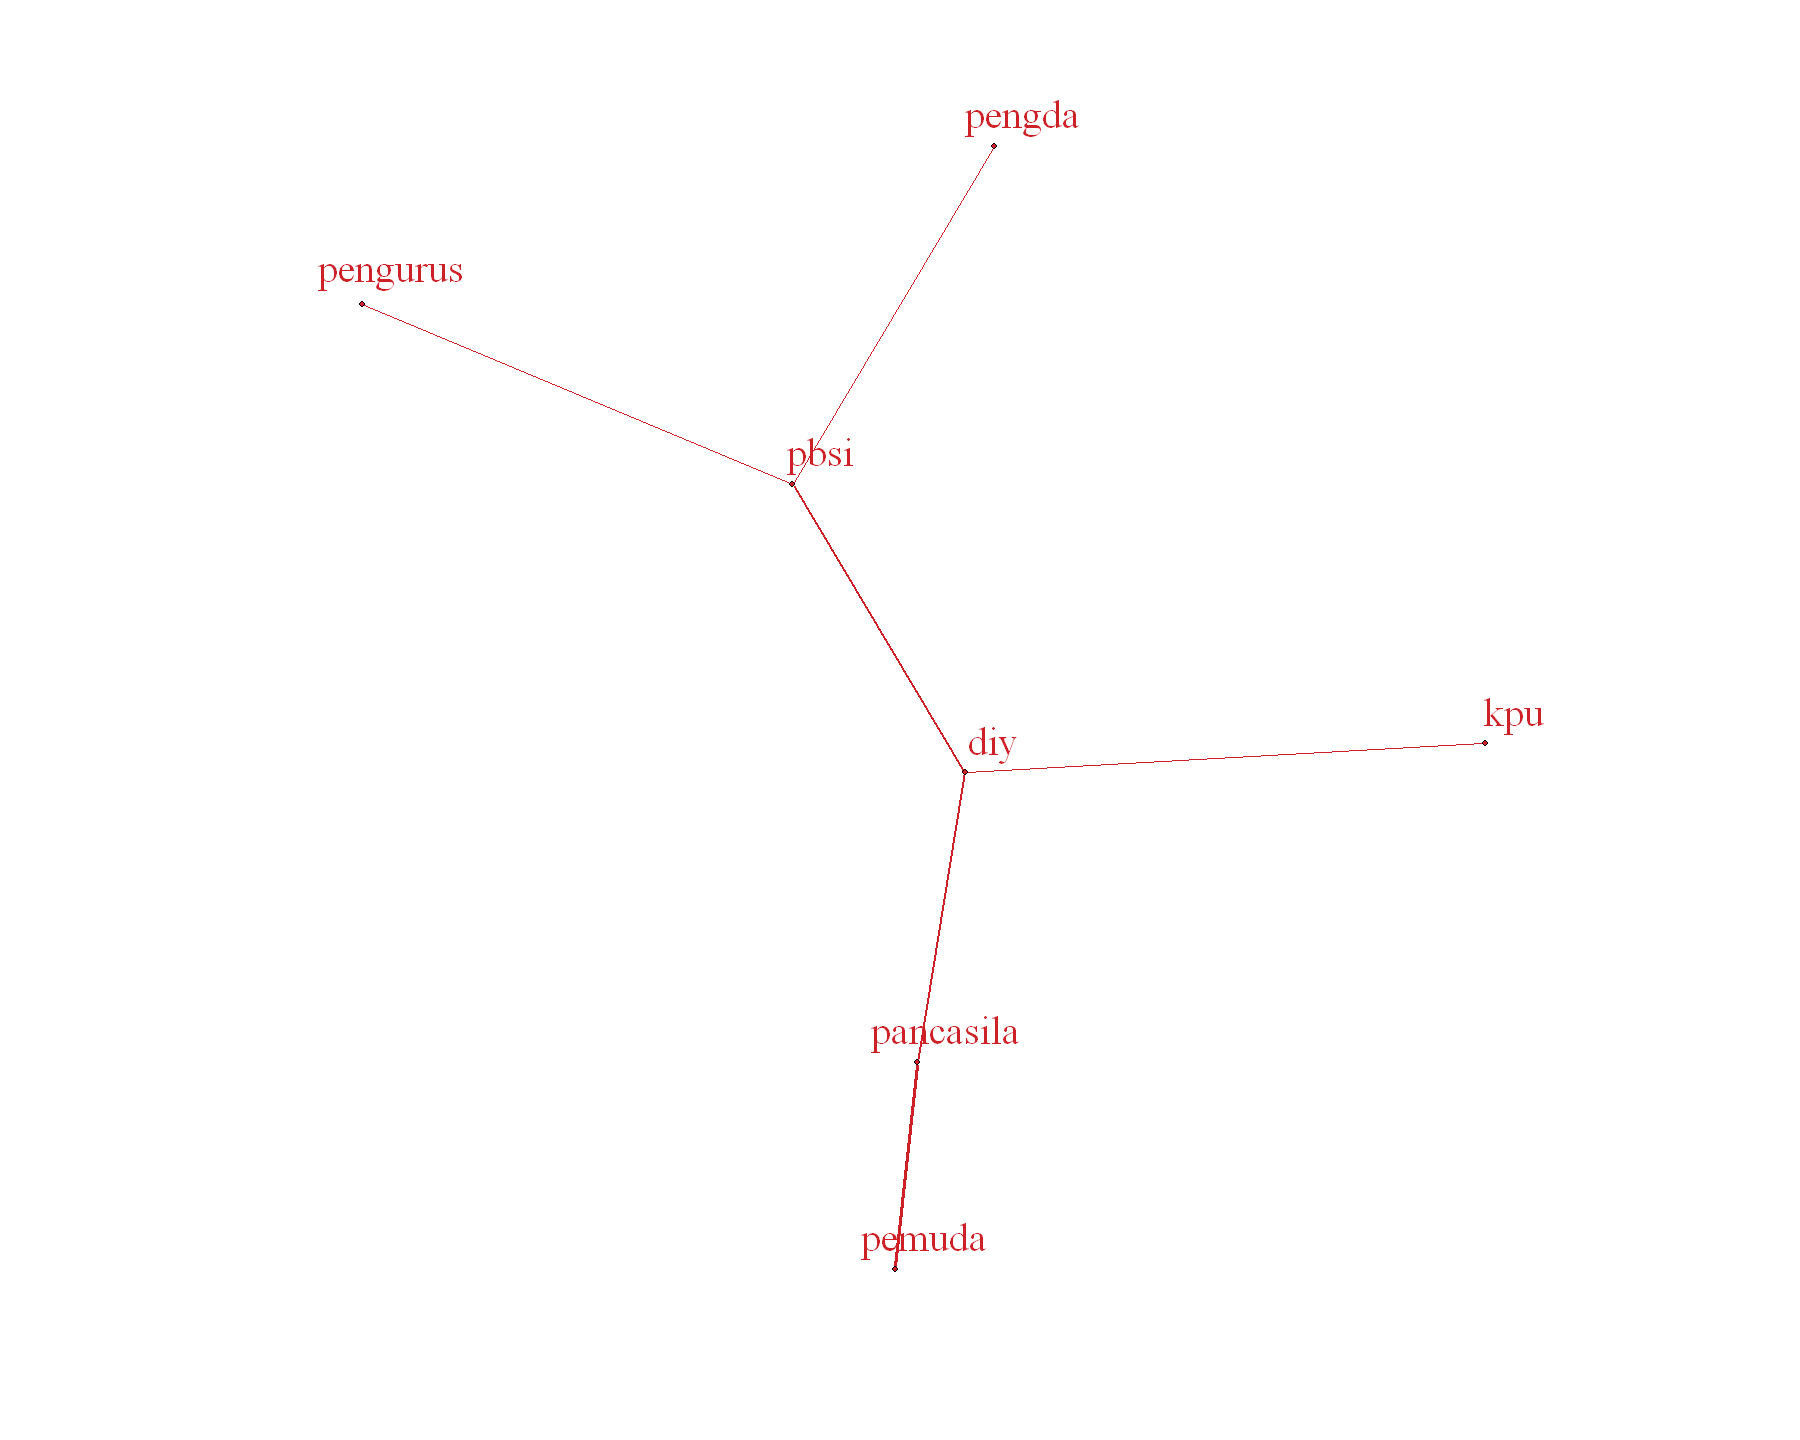

In [69]:
# Store the degree.
V(cc.network)$degree <- strength(graph = cc.network)

# Compute the weight shares.
E(cc.network)$width <- E(cc.network)$weight/max(E(cc.network)$weight)

plot(
  cc.network, 
  vertex.color = '#CD2027',
  # Scale node size by degree.
  vertex.size = 1,
  vertex.label.color = '#CD2027', 
  vertex.label.cex = 2, 
  vertex.label.dist = 1,
  edge.color = '#CD2027', 
  # Set edge width proportional to the weight relative value.
  edge.width = 3*E(cc.network)$width ,
  #sub = glue('Weiight Threshold: {threshold}'), 
  alpha = 50
)

In [626]:

# Treshold
threshold <- 6

network <-  bi.gram.count %>%
  filter(weight > threshold) %>%
  graph_from_data_frame(directed = FALSE)

# Store the degree.
V(network)$degree <- strength(graph = network)
# Compute the weight shares.
E(network)$width <- E(network)$weight/max(E(network)$weight)

# Create networkD3 object.
network.D3 <- igraph_to_networkD3(g = network)
# Define node size.
network.D3$nodes %<>% mutate(Degree = (1E-2)*V(network)$degree)
# Degine color group (I will explore this feature later).
network.D3$nodes %<>% mutate(Group = 1)
# Define edges width. 
network.D3$links$Width <- 10*E(network)$width

forceNetwork(
  Links = network.D3$links, 
  Nodes = network.D3$nodes, 
  Source = 'source', 
  Target = 'target',
  NodeID = 'name',
  Group = 'Group', 
  opacity = 0.9,
  Value = 'Width',
  Nodesize = 'Degree', 
  # We input a JavaScript function.
  linkWidth = JS("function(d) { return Math.sqrt(d.value); }"), 
  fontSize =40,
  zoom = TRUE, 
  opacityNoHover = 1
)

HTML widgets cannot be represented in plain text (need html)

In [551]:
# Treshold
threshold <- 30

network <-  bi.gram.count %>%
  filter(weight > threshold) %>%
  graph_from_data_frame(directed = FALSE)

# Store the degree.
V(network)$degree <- strength(graph = network)
# Compute the weight shares.
E(network)$width <- E(network)$weight/max(E(network)$weight)

# Create networkD3 object.
network.D3 <- igraph_to_networkD3(g = network)
# Define node size.
network.D3$nodes %<>% mutate(Degree = (1E-2)*V(network)$degree)
# Degine color group (I will explore this feature later).
network.D3$nodes %<>% mutate(Group = 1)
# Define edges width. 
network.D3$links$Width <- 10*E(network)$width

forceNetwork(
  Links = network.D3$links, 
  Nodes = network.D3$nodes, 
  Source = 'source', 
  Target = 'target',
  NodeID = 'name',
  Group = 'Group', 
  opacity = 0.9,
  Value = 'Width',
  Nodesize = 'Degree', 
  # We input a JavaScript function.
  linkWidth = JS("function(d) { return Math.sqrt(d.value); }"), 
  fontSize = 20,
  zoom = TRUE, 
  opacityNoHover = 1
)


HTML widgets cannot be represented in plain text (need html)